# **Συστήματα και Τεχνολογίες Γνώσης**
# **Θέμα 2**
Σε αυτό το θέμα θα κατασκευάσετε μια οντολογία η οποία θα περιγράφει το πεδίο των μουσικών κομματιών, και θα είναι συμβατή με το γράφο γνώσης που κατασκευάσατε στο πρώτο θέμα.

## <font color='red'> **1ο Μέρος: Συντακτικά Ορθή Οντολογία**</font>


Σε αυτό το μέρος θα μετατρέψετε το γράφο γνώσης που δημιουργήσατε στο πρώτο θέμα, σε συντακτικά ορθή οντολογία. Όποιος επιθυμεί (κυρίως για άτομα που δεν έχουν ολοκληρώσει το πρώτο θέμα) μπορεί να εργαστεί με το γράφο γνώσης που σας δίνεται στο αρχείο ```songs.nt```.
<!-- Όποιος χρησιμοποιήσει τη δική του γνώση (που δημιούργησε στο πρώτο θέμα) κι **ΌΧΙ** το movies.nt θα έχει bonus της τάξεως του 20%.  -->

Θα εργαστούμε με τη βιβλιοθήκη [owlready2](https://owlready2.readthedocs.io/en/latest/) η οποία δίνει πρόσβαση σε τεχνολογίες αναπαράστασης γνώσης και οντολογιών (π.χ. OWL) μέσω της Python.


In [ ]:
!pip install owlready2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 23.8 MB 1.1 MB/s 
  Created wheel for owlready2: filename=Owlready2-0.37-cp37-cp37m-linux_x86_64.whl size=20445981 sha256=f8dead0570df4e21217e932dfcc358c93fad07e366359402bae5cb244b08df47
  Stored in directory: /root/.cache/pip/wheels/34/49/36/31062d59333455aa0cb4950141cab4945600ce61c26a44e9cd
Successfully built owlready2


In [ ]:
!pip install rdflib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 482 kB 5.0 MB/s 
     |████████████████████████████████| 41 kB 689 kB/s 


In [ ]:
from rdflib import Graph, Literal, URIRef, Namespace, RDF, XSD

graph = Graph()
# graph_2rd_part in the graph that we created in Part 1 and here we use it again
graph.parse('/content/graph_updated_from_1st_part.nt',format='nt')

<Graph identifier=N8bd660f49e5d4f31a66df917c16861b5 (<class 'rdflib.graph.Graph'>)>

In [ ]:
counter = 0 
with open("graph_updated_from_1st_part.nt", "r") as f:
    for line in f:
        if 'http://www.w3.org/2001/XMLSchema#date' in line:
          counter += 1

print(f'Originally we have {counter} dates in our graph with the type XSD.date')

Originally we have 199 dates in our graph with the type XSD.date


### Ωστόσο στο δεύτερο μέρος αυτού του θέματος χρειαστεί να κάνουμε χρήση του sync_reasoner(). Από το πρώτο θέμα είχαμε θέσει τις ημερομηνίες γεννήσεως και θανάτου με τύπου ΧSD.date. Αυτός ο τύπος δεδομένων ωστόσο δεν υποστηρίζεται από  τους τύπους δεδομέων της OWL 2 datatype map. Οπότε παρακάτω αλλάζουμε τον τύπο από date σε string για να έχουμε την απαραίτητη υποστήριξη.

In [ ]:
altered_nodes_for_dates = 0
for a, b, c in graph:
  # we make sure to change the triples that contain datesofBirth and datesOfDeath from date to string 
  # beacause date is not supported by the datatypes from the OWL 2 datatype map used in reasoner
  if str(b) == "http://example.org/props/dateOfBirth":
        graph.remove((a, b, c))
        new_c = str(c)
        add_c = Literal(new_c, datatype=XSD.string)
        graph.add((a, b, add_c))
        altered_nodes_for_dates += 1
  if str(b) == "http://example.org/props/dateOfDeath":
        graph.remove((a, b, c))
        new_c = str(c)
        add_c = Literal(new_c, datatype=XSD.string)
        graph.add((a, b, add_c))
        altered_nodes_for_dates += 1

print(f'We have altered a total of {altered_nodes_for_dates} nodes regarding the change from date to string')

We have altered a total of 199 nodes regarding the change from date to string


In [ ]:
# we save our new graph with new types altered in graph_2rd_part_v_1

graph.serialize(destination='graph_2rd_part_v_1.nt',format='nt', encoding='utf-8')

<Graph identifier=N8bd660f49e5d4f31a66df917c16861b5 (<class 'rdflib.graph.Graph'>)>

In [ ]:
counter = 0 
with open("graph_2rd_part_v_1.nt", "r") as f:
    for line in f:
        if 'http://www.w3.org/2001/XMLSchema#date' in line:
          counter += 1

print(f'After the above changes we have {counter} dates in our graph with type XSD.date')

After the above changes we have 0 dates in our graph with type XSD.date


## <font color='red'> **1.1 Μετατροπή σε owl**</font>

Αν και η μορφή (format) του αρχείου είναι συμβατή με το πρότυπο OWL **δεν είναι μια σημασιολογικά ορθή οντολογία**, είναι απλά ένα σύνολο από δεδομένα σε μια μορφή που είναι συμβατή με το πρότυπο OWL. Μια οντολογία ορίζει ένα σύνολο από κανόνες που διέπουν έναν κόσμο, **δεν** είναι απλά μια αναπαράσταση των δεδομένων όπως είναι ένας γράφος γνώσης (αν και τα περισσότερα αξιώματα της οντολογίας μπορούν να αναπαρασταθούν με γράφους γνώσης).

Τα βασικά συστατικά μέρη μιας οντολογίας είναι οι ατομικές έννοιες -τις οποίες συναντάμε στην OWL ως κλάσεις-(concepts-CN), οι ατομικοί ρόλοι -τους οποίους συναντάμε στην OWL ως ιδιότητες αντικειμένου και ιδιότητες τύπου δεδομένων- (roles-RN) και τα άτομα (individuals-IN). Με βάση αυτά κατασκευάζονται εκφράσεις σύνθετων εννοιών  και ρόλων, και αξιώματα (axioms).

Στην παρούσα φάση δεν έχουμε αξιώματα και τόσο το σύνολο CN όσο και το RN είναι κενά. Πρακτικά έχουμε μόνο πληροφορία που αφορά τους individuals (τα άτομα του κόσμου μας) η οποία προέρχεται από το γράφο γνώσης μας. Δεν έχουμε λοιπόν καμία πληροφορία για τους κανόνες που διέπουν τον κόσμο, τις έννοιες από τις οποίες αποτελείται ο κόσμος μας όπως και τις πιθανές σχέσεις μεταξύ αυτών των εννοιών. Αυτή την πληροφορία καλείστε να συμπληρώσετε στη συνέχεια της άσκησης.

Στην οντολογία μας λοιπόν θα πρέπει να ορίσουμε αρχικά έννοιες:
```xml
#RDF/XML
<owl:Class rdf:about="http://example.org/ns/Concept"/>

#N-triples
<http://example.org/ns/Concept> <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://www.w3.org/2002/07/owl#Class> 
```
καθώς και ρόλους:
```xml
#RDF/XML
<owl:ObjectProperty rdf:about="http://example.org/props/role"/>

#N-triples
<http://example.org/props/role> <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://www.w3.org/2002/07/owl#ObjectProperty> 
```



## <font color='red'> **1.1.1: Αρχικοποίηση του CN**</font>

Σε πρώτη φάση πρέπει να ορίσετε τις απαραίτητες έννοιες για να αναπαρασταθούν σωστά τα δεδομένα σας, δηλαδή κάθε άτομο του κόσμου σας να έχει έναν τύπο ο οποίος θα είναι κάποια έννοια. Για παράδειγμα στα δεδομένα σας έχετε σίγουρα μουσικά κομμάτια και συνθέτες. Για να αναπαρασταθούν σωστά αυτά τα άτομα είναι απαραίτητες οι έννοιες "Song" και "Composer" αντίστοιχα. Φυσικά μπορείτε να δώσετε ό,τι ονόματα επιθυμείτε εσείς στις έννοιες, όμως θα συνιστούσαμε να κρατήσετε το ίδιο μοτίβο σε όλη την άσκηση, και να δώσετε χαρακτηριστικά αλλά και συνοπτικά ονόματα τόσο στις έννοιες όσο και στους ρόλους. Για αρχή θα ορίσουμε όλες τις έννοιες να είναι υποέννοιες (subClassOf) του Thing, και σε επόμενο ερώτημα θα προχωρήσουμε στη δημιουργία πιο σύνθετων ιεραρχιών. 

Πρώτα όμως πρέπει να αρχικοποιήσουμε μια οντολογία φορτώνοντας το γράφο γνώσης στο owlready2 με την εντολή
```python
onto=get_ontology('file://path/to/knowledge/graph').load()
```
Θα ορίσουμε τους ονοματοχώρους που χρησιμοποιεί, στη συγκεκριμένη περίπτωση  "prop" για τους ρόλους (που αντιστοιχούν στις ιδιότητες του γράφου- properties) και "ns" για τις έννοιες.
```python
prop = onto.get_namespace('http://example.org/props/')
ns = onto.get_namespace('http://example.org/ns/')
```

Ο ορισμός των εννοιών Song και Composer κάτω από το Thing, χρησιμοποιώντας τον ονοματοχώρο ```http://example.org/ns/``` στην owlready2 γίνεται ως εξής:
```python
with onto:
  with ns:
    class Song(Thing):
      pass
    class Composer(Thing):
      pass
```

Αν τώρα αποθηκεύσουμε την οντολογία, θα παρατηρήσουμε πως έχουν προστεθεί τριάδες της μορφής
```xml
#RDF/XML
<owl:Class rdf:about="http://example.org/ns/Composer">
  <rdfs:subClassOf rdf:resource="http://www.w3.org/2002/07/owl#Thing"/>
</owl:Class>

#N-triples
<http://myontology.org#Composer> <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://www.w3.org/2002/07/owl#Class> .
<http://myontology.org#Composer> <http://www.w3.org/2000/01/rdf-schema#subClassOf> <http://www.w3.org/2002/07/owl#Thing> .
```
Δηλαδή έχει οριστεί η έννοια Composer ως owl:Class η οποία είναι υποέννοια (rdfs:subClassOf) του owl:Thing.

Με τον ίδιο τρόπο καλείστε να αρχικοποιήσετε το σύνολο ονομάτων εννοιών - CN.

*Σημείωση: δεν είναι απαραίτητο να ορίσετε ρητά ποια individual είναι τύπου Song, Composer, κλπ. μιας και αυτό μπορεί να το συμπεράνει ο reasoner (θα δούμε τι είναι αυτό στο μάθημα και στο επόμενο θέμα) εάν ορίσετε τα κατάλληλα πεδία τιμών και πεδία ορισμού που θα δείτε στο δεύτερο (2ο) μέρος.* 

Μπορείτε να "σώσετε" μια οντολογία με την owlready2 όπως φαίνεται παρακάτω, σε μορφή RDF/XML και N-triples αντίστοιχα. Η μορφή RDF/XML είναι η default επιλογή.

```python
with onto:
  #RDF/XML
  onto.save('myOnto.owl',format='rdfxml')
  # or just: onto.save('myOnto.owl')

  #N-triples
  onto.save('myOnto.nt',format='ntriples')

```

## **Απάντηση 1.1.1**: Από το προηγούμενο θέμα έχουμε τις παρακάτω διακριτές έννοιες στο γράφο μας.

| <font color='blue' size='4'> **ns**</font>      |
| ---------------------------------------------------|
||
| <font color='blue' size='4'> **Id**</font>|
| <font color='blue' size='4'> **Composer**</font>|
| <font color='blue' size='4'> **Song**</font>|
| <font color='blue' size='4'> **Emotion**</font>|
| <font color='blue' size='4'> **Genre**</font>|
| <font color='blue' size='4'> **Instrument**</font>|
| <font color='blue' size='4'> **Publisher**</font>|
| <font color='blue' size='4'> **Place**</font>|

In [ ]:
from owlready2 import *

#################

onto=get_ontology('/content/graph_2rd_part_v_1.nt').load()
prop = onto.get_namespace('http://example.org/props/')
ns = onto.get_namespace('http://example.org/ns/')

with onto:
  with ns:
    class Id(Thing):
      pass
    class Composer(Thing):
      pass
    class Song(Thing):
      pass
    class Emotion(Thing):
      pass
    class Genre(Thing):
      pass
    class Instrument(Thing):
      pass
    class Publisher(Thing):
      pass
    class Place(Thing):
      pass

with onto:
  #RDF/XML
  onto.save('myOnto.owl',format='rdfxml')
  #N-triples
  onto.save('myOnto.nt',format='ntriples')

#################

## <font color='red'> **1.1.2 Αρχικοποίηση του RN**</font>

Σειρά έχει η αρχικοποίηση του RN. Πρακτικά θέλουμε να δημιουργήσετε έναν ρόλο για κάθε ιδιότητα (property) του γράφου γνώσης σας. Αυτό μπορείτε να το επιτύχετε ορίζοντας πως κάθε ακμή του γράφου γνώσης είναι ένα ```owl:ObjectProperty``` αν συνδέει individuals μεταξύ τους ή ένα ```owl:DataProperty``` αν συνδέει individuals με τύπους δεδομένων.  

Προσοχή: οι ρόλοι **ΔΕΝ** συνδέουν individuals με έννοιες, αυτό γίνεται μέσω της σχέσης rdfs:type. Θα πρέπει λοιπόν να έχετε κατά νου πως δεν πρέπει να δημιουργήσετε ρόλους που συνδέουν individuals με έννοιες, το οποίο είναι πολύ πιθανό να συμβεί σε περίπτωση που στο γράφο γνώσης σας έχετε κάποια σχέση της μορφής "is_a". 

Για να ορίσουμε τους απαραίτητους ρόλους, πρώτα βρίσκουμε το σύνολο ονομάτων ακμών στο γράφο γνώσης, δηλαδή το σύνολο των URIs τα οποία εμφανίζονται στη μεσαία θέση μιας τριάδας. Έστω πως το σύνολο αυτό περιέχει τα εξής URIs:
```
<http://example.org/props/hasGenre>
<http://example.org/props/hasDateOfBirth>
```

Θέλουμε να ορίσουμε λοιπόν πως το URI ```<http://example.org/props/hasGenre>``` είναι owl:ObjectProperty ενώ το ```<http://example.org/props/hasDateOfBirth>``` είναι owl:DataProperty. Στην owlready2 αυτό γίνεται ως εξής:
```python
with onto:
  with prop:
    class hasGenre(ObjectProperty):
      pass
    class hasDateOfBirth(DataProperty):
      pass
```

Αν τώρα αποθηκεύσουμε την οντολογία σε ένα αρχείο
```python
with onto:
  #RDF/XML
  onto.save('myonto.owl')

  #N-triples
  onto.save('myonto.nt',format='ntriples')
```
και ανοίξουμε το αρχείο θα δούμε να έχουν προστεθεί τα ακόλουθα:
```xml
#RDF/XML
<owl:ObjectProperty rdf:about="http://example.org/props/hasGenre"/>
<owl:DatatypeProperty rdf:about="http://example.org/props/hasDateOfBirth"/>


#N-triples
<http://example.org/props/hasGenre> <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://www.w3.org/2002/07/owl#ObjectProperty> .
<http://example.org/props/hasDateOfBirth> <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://www.w3.org/2002/07/owl#DatatypeProperty> .
```
Δηλαδή προσθέσαμε τα ονόματα δύο ρόλων στην οντολογία μας, η οποία αρχίζει να παίρνει μορφή. 

Για ακόμη συνεπέστερη αρχικοποίηση ρόλων μπορείτε να ορίσετε το domain (πεδίο ορισμού) και το range (πεδίο τιμών) του κάθε property. Επίσης, αν ο ρόλος είναι μονοσήμαντος, τότε πρέπει να οριστεί ως functional property. Για παράδειγμα, γνωρίζουμε ότι η ιδιότητα hasDateOfBirth είναι μονοσήμαντη και συνδέει συνθέτες με την ημερομηνία γέννησής τους, σε μορφή datetime. Μια πλήρης αρχικοποίηση αυτής της ιδιότητας είναι η εξής:

```python
from datetime import datetime
with onto:
  with prop:
    class hasDateOfBirth(DataProperty, FunctionalProperty): 
            domain   = [Composer]
            range     = [datetime]
            pass
```

Με τον ίδιο τρόπο καλείστε να αρχικοποιήσετε την οντολογία σας και να ορίσετε το σύνολο ονομάτων ρόλων - RN.

*Προσοχή: σε αυτό το βήμα να χρησιμοποιήσετε για ονόματα ρόλων τα ίδια ακριβώς ονόματα που υπάρχουν στις ιδιότητες του γράφου γνώσης σας ώστε να μην χρειάζετε να κάνετε αλλαγές στη συνέχεια. Εάν ορίσετε διαφορετικό όνομα (π.χ. ορίσετε το ρόλο "genres" για την ιδιότητα "hasGenres" που υπάρχει στο γράφο γνώσης) τότε θα πρέπει στη συνέχεια να αλλάξετε την πληροφορία που έχετε για όλα τα άτομα του κόσμου σας, ενώ εάν χρησιμοποιήσετε το ίδιο όνομα (και ίδιο ονοματόχωρο όπως έχουμε ορίσει παραπάνω) αυτό δεν θα χρειαστεί διότι θα είναι συμβατή η ονομασία με την ήδη υπάρχουσα πληροφορία (π.χ. η "τριάδα RDF" ```<http://example.org/ns/446_LO11344164> <http://example.org/props/hasGenre> <http://example.org/ns/Pop>``` που μπορεί να υπάρχει ήδη στην οντολογία μας από το γράφο γνώσης θα δείχνει τη σύνδεση με το ρόλο "hasGenre" μεταξύ του μουσικού κομματιού με europeanaID "446_LO11344164" και της Pop ενώ εάν ο αντίστοιχος ρόλος έχει ονομαστεί διαφορετικά τότε αυτή η τριάδα δεν θα αντιστοιχεί σε κανένα ρόλο της οντολογίας μας και θα πρέπει να την αλλάξουμε).*

## **Απάντηση 1.1.2**: Από το προηγούμενο θέμα έχουμε τoυς παρακάτω ρόλους στο γράφο μας.

| <font color='red' size='4'> **Props**</font>      |
| ---------------------------------------------------|
||
| <font color='blue' size='4'> **id(ns)->**</font><font color='red' size='4'> **hasTitle**</font><font color='blue' size='4'> **->title(ns)**</font>|
| <font color='blue' size='4'> **id(ns)->**</font><font color='red' size='4'> **hasPublisher**</font><font color='blue' size='4'> **->publisher(ns)**</font>|
| <font color='blue' size='4'> **id(ns)->**</font><font color='red' size='4'> **hasPlace**</font><font color='blue' size='4'> **->place(ns)**</font>|
| <font color='blue' size='4'> **title(ns)->**</font><font color='red' size='4'> **hasComposer**</font><font color='blue' size='4'> **->composer(ns)**</font>|
| <font color='blue' size='4'> **title(ns)->**</font><font color='red' size='4'> **hasEmotion**</font><font color='blue' size='4'> **->emotion(ns)**</font>|
| <font color='blue' size='4'> **title(ns)->**</font><font color='red' size='4'> **hasGenre**</font><font color='blue' size='4'> **->genre(ns)**</font>|
| <font color='blue' size='4'> **title(ns)->**</font><font color='red' size='4'> **hasInstrument**</font><font color='blue' size='4'> **->instrument(ns)**</font>|
| <font color='blue' size='4'> **title(ns)->**</font><font color='red' size='4'> **hasYear**</font><font color='blue' size='4'> **->year(literal, datatype=XSD.integer)**</font>|
| <font color='blue' size='4'> **title(ns)->**</font><font color='red' size='4'> **hasDuration**</font><font color='blue' size='4'> **->duration(literal, datatype=XSD.integer)**</font>|
| <font color='blue' size='4'> **composer(ns)->**</font><font color='red' size='4'> **hasGenre**</font><font color='blue' size='4'> **->genre(ns)**</font>|
| <font color='blue' size='4'> **composer(ns)->**</font><font color='red' size='4'> **hasInstrument**</font><font color='blue' size='4'> **->instrument(ns)**</font>|
| <font color='blue' size='4'> **composer(ns)->**</font><font color='red' size='4'> **dateOfBirth**</font><font color='blue' size='4'> **->date(literal, datatype=XSD.date)**</font>|
| <font color='blue' size='4'> **composer(ns)->**</font><font color='red' size='4'> **dateOfDeath**</font><font color='blue' size='4'> **->date(literal, datatype=XSD.date)**</font>|
| <font color='blue' size='4'> **composer(ns)->**</font><font color='red' size='4'> **hasBiography**</font><font color='blue' size='4'> **->biography(literal, datatype=XSD.string)**</font>|

In [ ]:
#################
with onto:
  with prop:
    class hasTitle(ObjectProperty, FunctionalProperty): 
      domain = [Id]
      range = [Song]
      pass
    class hasPublisher(ObjectProperty): 
      domain = [Id]
      range = [Publisher]
      pass
    class hasPlace(ObjectProperty): 
      domain = [Id]
      range = [Place]
      pass
    class hasComposer(ObjectProperty): 
      domain = [Song]
      range = [Composer]
      pass
    class hasEmotion(ObjectProperty): 
      domain = [Song]
      range = [Emotion]
      pass
    class hasGenre(ObjectProperty): 
      domain = [Song, Composer]
      range = [Genre]
      pass
    class hasInstrument(ObjectProperty): 
      domain = [Song, Composer]
      range = [Instrument]
      pass
    class hasYear(DataProperty): 
      domain = [Song]
      range = [int]
      pass
    class hasDuration(DataProperty): 
      domain = [Song]
      range = [int]
      pass
    class dateOfBirth(DataProperty, FunctionalProperty): 
      domain = [Composer]
      range = [str]
      pass
    class dateOfDeath(DataProperty, FunctionalProperty): 
      domain = [Composer]
      range = [str]
      pass
    class hasBiography(DataProperty): 
      domain = [Composer]
      range = [str]
      pass

#################

In [ ]:
with onto:
  onto.save('myonto_new.owl')
  onto.save('myonto_new.nt',format='ntriples')

## <font color='red'> **1.1.3 Σημασιολογικά Ορθή Οντολογία**</font>

Πλέον έχουμε μετατρέψει το γράφο γνώσης μας σε μια συντακτικά ορθή οντολογία. Αυτό δεν σημαίνει όμως πως είναι και σημασιολογικά ορθή και συνεπής.

Αυτή τη στιγμή έχετε αντιστοιχίσει συντακτικά το γράφο γνώσης του πρώτου θέματος σε μια οντολογία. Προσθέσατε τις κατάλληλες έννοιες (π.χ. Song, Genre, κλπ) και αντιστοιχίσατε τις ιδιότητες (properties) στους κατάλληλους ρόλους. Όμως η μοντελοποίηση αυτής της οντολογίας μπορεί να μην είναι σωστή ή/και συνεπής, διότι η οντολογία, όπως έχουμε αναφέρει και παραπάνω, δεν είναι απλώς ένας διαφορετικός τρόπος να αναπαραστήσει κανείς ένα γράφο γνώσης. Μία οντολογία μοντελοποιεί έναν κόσμο (όπου συνήθως βασίζεται στον πραγματικό κόσμο), διέπεται από σαφείς κανόνες, και απαιτεί ορισμένες σχεδιαστικές επιλογές από το δημιουργό της. 

Σε αυτό το ζητούμενο καλείστε να μελετήσετε την οντολογία που έχετε δημιουργήσει μέχρι στιγμής και να αναθεωρήσετε/αλλάξετε ορισμένα κομμάτια της μοντελοποίησης ώστε να είναι πιο ορθή / να ανταποκρίνεται καλύτερα στην πραγματικότητα.  
Για παράδειγμα πιθανότατα στην οντολογία που έχετε δημιουργήσει, ένα μουσικό κομμάτι (ένας individual που έχει type Song) συνδέεται με έναν ρόλο της μορφής hasGenre με έναν άλλο individual που είναι τύπου Genre και αντιστοιχεί στη rock (ή οποιοδήποτε άλλο genre). Αυτή, αν και τυπικά δεν είναι λαθος μοντελοποιηση, δεν μπορεί να θεωρηθεί ούτε απόλυτα σωστή, μιας και η rock δεν είναι άτομο του κόσμου μας, είναι μια έννοια/ένας όρος με τον οποίο χαρακτηρίζονται έργα με ορισμένα (ίσως κι αφηρημένα) χαρακτηριστικά. 

Θα μπορούσε κάποιος να σκεφτεί να ορίσει την έννοια Genre, και όλα τα είδη ως υποέννοιες της Genre. Στη συνέχεια να προσθέσει την πληροφορία πως κάθε μουσικό κομμάτι (individual με type Song) μπορεί να είναι και τύπου Rock το οποίο θα είναι υποέννοια του Genre όπως αναφέραμε. Αυτή η μοντελοποίηση είναι όμως **ΛΑΘΟΣ**, αφού αν οριστεί ένα μουσικό κομμάτι ως άτομο τύπου Rock, τότε αφού η Rock είναι υποέννοια του Genre, προκύπτει σημασιολογικά πως το μουσικό κομμάτι αυτό είναι άτομο τύπου Genre, το οποίο είναι λάθος.

Άρα στην περίπτωσή μας όπου δημιουργούμε μια οντολογία για μουσικά κομμάτια πιο ορθή φαντάζει μια μοντελοποίηση της πληροφορίας πως κάποιο μουσικό κομμάτι είναι Rock ως μίας έννοιας RockSong (ή και απλά Rock) όπου είναι υποέννοια (subClassOf) της έννοιας Song. 

Καλείστε λοιπόν να εντοπίσετε και να διορθώσετε αντίστοιχα λάθη μοντελοποίησης της οντολογίας σας. Αφαιρέστε τη "λανθασμένη" πληροφορία και αντικαταστήστε τη με την "ορθή". Στο παραπάνω παράδειγμα με την Rock μια τέτοια αντικατάσταση θα μπορούσε να γίνει δημιουργώντας τις κατάλληλες έννοιες (RockSong, PopSong, κλπ), ορίζοντας το κατάλληλο type στους αντίστοιχους individuals και αφαιρώντας τους ρόλους hasGenre καθώς και όλους τους individuals που αντιστοιχούσαν σε κάποιο Genre.
Αναφέρετε συνοπτικά τις αλλαγές που κάνατε και σχολιάστε τις. 

<!-- Παρακάτω δίνεται ενδεικτικό κομμάτι κώδικα για να επιτελέσετε τα παραπάνω.  -->

Στο τέλος αυτού του μέρους αποθηκεύστε την οντολογία σας σε ένα αρχείο KR-Ex2_1.owl όπως δείξαμε παραπάνω, το οποίο θα παραδοθεί μαζί με τα υπόλοιπα αρχεία στο τέλος της άσκησης. 

## **Απάντηση 1.1.3**

## Παρακάτω θα αλλάξουμε εκείνες τις τριάδες που χαρακτηρίζουν ένα τράγουδι και ένα συναίσθημα. Eπίσης από το Θέμα 1ο είχαμε εισάγει τα genres που χαρακτηρίζουν κάθε συνθέτη. Είχαμε εισάγει δηλαδή τριάδες της μορφής composer(ns)->hasGenre->genre(ns). Προφανώς αν και είχαμε το ίδιο property hasGenre για composers και τραγούδια τα genres ανάλογα με το query επέστρεφαν είτε song genres είτε composer genres. Oπότε στα πλαίσια βελτίωσης της οντολογίας θα κάνουμε αλλαγές και στις τριάδες που χαρακτηρίζουν ένα συνθέτη.
## Eπίσης αρχικά είχαμε την κλάση Song στην οποία πλέον δημιουργούμε 2 υποκλάσεις Song_Genres και Song_Emotions.
## Συγκεκριμένα θα κάνουμε τις παρακάτω αλλαγές:

| <font color='red' size='4'> **Πριν**</font>      | <font color='red' size='4'> **Μετά**</font>   |
| --------------------------------|----------------------|
| <font color='blue' size='4'> **Song Class**| <font color='blue' size='4'> **We create 2 subclasses of Song Class: Song_Genres, Song_Emotions**|
| <font color='blue' size='4'> **title(ns)->**</font><font color='red' size='4'> **hasGenre**</font><font color='blue' size='4'> **->genre(ns)**</font>| <font color='blue' size='4'> **title(ns)->**</font><font color='red' size='4'> **RDF.type**</font><font color='blue' size='4'> **->Song_Genres(ns)  -> subClassOf Song(ns)**</font>|
| <font color='blue' size='4'> **composer(ns)->**</font><font color='red' size='4'> **hasGenre**</font><font color='blue' size='4'> **->genre(ns)**</font>| <font color='blue' size='4'> **composer(ns)->**</font><font color='red' size='4'> **RDF.type**</font><font color='blue' size='4'> **->(ns) ->'Genre'_Composer ->subClassOf Composer(ns)**</font>|
|<font color='#009707' size='4'> **So we delete entire the hasGenre property (for Song class and Composer class) but we keep the Song and Composer Class.**</font>|
|<font color='#009707' size='4'> **Also we delete the entire Genre Class**</font>|
|||
|||
| <font color='blue' size='4'> **title(ns)->**</font><font color='red' size='4'> **hasEmotion**</font><font color='blue' size='4'> **->emotion(ns)**</font>| <font color='blue' size='4'> **title(ns)->**</font><font color='red' size='4'> **RDF.type**</font><font color='blue' size='4'> **-> Song_Emotions(ns) ->subClassOf Song(ns)**</font>|
|<font color='#009707' size='4' > **Also we delete entire the hasEmotion property and the Emotion Class**</font>|
|||
|||

In [ ]:
from rdflib import Graph, Literal, URIRef, Namespace, RDF, XSD

graph = Graph()
# graph_2rd_part_v_1 is the graph that we created in the beginning of this notebook
graph.parse('/content/graph_2rd_part_v_1.nt',format='nt')

<Graph identifier=Nf7e84c994c574c6e89fafd98486ba4f4 (<class 'rdflib.graph.Graph'>)>

In [ ]:
ans=graph.query(
    """
      PREFIX exp: <http://example.org/props/>
      PREFIX ex: <http://example.org/ns/>
      
      SELECT DISTINCT ?genre
       WHERE {
          ?id exp:hasTitle ?title.
          ?title exp:hasGenre ?genre. #we make sure we show genres for songs.
       }""")

print(f'We have a total of {len(ans)} genres that describe our titles')
genre_list = []
for genre in ans:
    print(str(genre[0]).split("/")[-1])
    genre_list.append(str(genre[0]).split("/")[-1])

We have a total of 11 genres that describe our titles
Classical
Opera
Instrumental
Traditional_Folk
Country
Jazz
Pop
Rock
Reggae
Funk
Hip_Hop


In [ ]:
ans=graph.query(
    """
      PREFIX exp: <http://example.org/props/>
      PREFIX ex: <http://example.org/ns/>
      
      SELECT DISTINCT ?emotion
       WHERE {
          ?id exp:hasTitle ?title.
          ?title exp:hasEmotion ?emotion. 
       }""")

print(f'We have a total of {len(ans)} emotions that describe our titles')
emotion_list = []
for emotion in ans:
    print(str(emotion[0]).split("/")[-1])
    emotion_list.append(str(emotion[0]).split("/")[-1])

We have a total of 8 emotions that describe our titles
Anxiety
Sadness
Fear
Calmness
Arousal
Joy
Pleasure
Boredom


In [ ]:
ans=graph.query(
    """
      PREFIX exp: <http://example.org/props/>
      PREFIX ex: <http://example.org/ns/>
      
      SELECT DISTINCT ?composers
       WHERE {
          ?title exp:hasComposer ?composers
       }""")

print(f'We have a total of {len(ans)} composers')
composer_list = []
for composer in ans:
    #print(str(genre[0]).split("/")[-1])
    composer_list.append(str(composer[0]).split("/")[-1])

We have a total of 254 composers


In [ ]:
def modify_genres(input_genre):
  first_char = input_genre[0].upper()
  input_genre = input_genre + "_Song"
  modified_genre = first_char + input_genre[1:]
  return modified_genre

In [ ]:
def modify_emotions(input_emotion):
  switcher = {
      "Pleasure": "Pleasurable_Song",
      "Joy": "Joyful_Song",
      "Arousal": "Arousing_Song",
      "Anxiety": "Stressful_Song",
      "Calmness": "Calm_Song",
      "Sadness": "Sad_Song",
      "Fear": "Terrifying_Song",
      "Boredom": "Boring_Song"
      }
  input_emotion = input_emotion[0].upper() + input_emotion[1:]
  return switcher.get(input_emotion)

In [ ]:
modified_genres = []
for genre in genre_list:
  genre = modify_genres(genre)
  modified_genres.append(genre)

In [ ]:
modified_emotions = []
for emotion in emotion_list:
  emotion = modify_emotions(emotion)
  modified_emotions.append(emotion)

In [ ]:
modified_genres, modified_emotions

(['Classical_Song',
  'Opera_Song',
  'Instrumental_Song',
  'Traditional_Folk_Song',
  'Country_Song',
  'Jazz_Song',
  'Pop_Song',
  'Rock_Song',
  'Reggae_Song',
  'Funk_Song',
  'Hip_Hop_Song'],
 ['Stressful_Song',
  'Sad_Song',
  'Terrifying_Song',
  'Calm_Song',
  'Arousing_Song',
  'Joyful_Song',
  'Pleasurable_Song',
  'Boring_Song'])

## Παρακάτω βλέπουμε πως έχουμε 80 genres που χαρακτηρίζουν τους composers μας. Οπότε από αυτά τα 80 composer genres κρατάμε τα 77 καθώς τα 3 που αποφεύγονται χαρακτηρίζουν 1 συνθέτη το κάθε ένα. Συνολικά γίνεται μια κατηγοριοποίηση σε 10 τελικά genres για τους συνθέτες μας από τα αρχικά 80 genres.

In [ ]:
ans=graph.query(
    """
      PREFIX exp: <http://example.org/props/>
      PREFIX ex: <http://example.org/ns/>
      
      SELECT DISTINCT ?composer_genres
       WHERE {
          ?title exp:hasComposer ?composer.
          ?composer exp:hasGenre ?composer_genres # we make sure we show genres for composers and not songs
       }""")

print(f'We have a total of {len(ans)} composer genres')
composer_genres = []
for composer_genre in ans:
    #print(str(genre[0]).split("/")[-1])
    composer_genres.append(str(composer_genre[0]).split("/")[-1])

We have a total of 80 composer genres


In [ ]:
def modify_composers(input_genre):
  pop = ["J_pop", "Pop", "pop_rock", "electro", "electropop", "operatic_pop","new_age_music", "Italo_disco", "synth_pop", "pop_music", "easy_listening"]
  country = ["Country", "country_music", "Americana"]
  classical = ["Classical", "choral_symphony", "bard_song", "20th_century_classical_music", "choral_music", "sinfonia", "concerto",
               "oratorio", "mass", "operetta", "Baroque_music", "western_classical_music", "symphony", "chamber_music",
               "Classical_period", "Romantic_music", "cantata", "Impressionism", "impressionist_music", "church_music"]
  instrumental = ["Instrumental", "minimalist_music", "film_score", "drone", "ballet", "orchestra", "neoclassical_new_age_music"]
  opera = ["Opera", "opera", "zarzuela", "French_opera", "rock_opera"]
  jazz = ["Jazz", "jazz", "swing_music"]
  rock = ["roots_rock", "pop_rock", "Rock", "indie_rock", "psychedelic_rock", "Italian_progressive_rock", "blues", "soft_rock", "art_rock", 
          "proto_punk", "experimental_rock", "rock_and_roll", "rock_music", "alternative_rock", "folk_rock", "glam_rock", "noise_rock", "blue_eyed_soul", "rock_opera"]
  traditional_folk = ["salsa", "music_of_Latin_America", "fado", "Traditional_Folk", "world_music", "Hungarian_folk_music", "folk_rock", 
                      "traditional_folk_music", "folk_music", "musica_popular_brasileira"]
  hip_hop = ["trip_hop"]
  funk = ["Funk"]
  
  composer_genres = [(pop, "Pop_Composer"), (country, "Country_Composer"), (classical, "Classical_Composer"), 
                     (instrumental, "Instrumental_Composer"), (funk, "Funk_Composer"),
                     (opera, "Opera_Composer"), (jazz, "Jazz_Composer"), (rock, "Rock_Composer"), 
                     (traditional_folk, "Traditional_Folk_Composer"), (hip_hop, "Hip_Hop_Composer")]

  for t in composer_genres:
    if input_genre in t[0]:
      return t[1]

In [ ]:
with onto:
  with ns:
    # first we create the 2 subClasses of Song Class
    class Song_Genres(Song):
      pass
    class Song_Emotions(Song):
      pass    
    # below are the subClasses of Song_Genres Class
    class Classical_Song(Song_Genres):
      pass
    class Instrumental_Song(Song_Genres):
      pass
    class Jazz_Song(Song_Genres):
      pass
    class Rock_Song(Song_Genres):
      pass
    class Pop_Song(Song_Genres):
      pass
    class Country_Song(Song_Genres):
      pass
    class Opera_Song(Song_Genres):
      pass
    class Hip_Hop_Song(Song_Genres):
      pass
    class Traditional_Folk_Song(Song_Genres):
      pass
    class Funk_Song(Song_Genres):
      pass
    class Reggae_Song(Song_Genres):
      pass
    # below are the subClasses of Song_Emotions Class
    class Pleasurable_Song(Song_Emotions):
      pass
    class Joyful_Song(Song_Emotions):
      pass
    class Arousing_Song(Song_Emotions):
      pass
    class Stressful_Song(Song_Emotions):
      pass
    class Calm_Song(Song_Emotions):
      pass
    class Sad_Song(Song_Emotions):
      pass
    class Terrifying_Song(Song_Emotions):
      pass
    class Boring_Song(Song_Emotions):
      pass
    # below are the subClasses of Composer Class
    class Classical_Composer(Composer):
       pass
    class Instrumental_Composer(Composer):
       pass
    class Jazz_Composer(Composer):
       pass
    class Rock_Composer(Composer):
       pass
    class Pop_Composer(Composer):
       pass
    class Country_Composer(Composer):
       pass
    class Opera_Composer(Composer):
       pass
    class Hip_Hop_Composer(Composer):
       pass
    class Traditional_Folk_Composer(Composer):
       pass
    class Funk_Composer(Composer):
       pass

with onto:
  onto.save('KR_Ex2_1.owl')
  onto.save('KR_Ex2_1.nt',format='ntriples')

In [ ]:
# here we remove the line </content/graph_2rd_part_v_1.nt> <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://www.w3.org/2002/07/owl#Ontology> .
# from the original KR_Ex2_1.nt because we cannot parse the line later in the Graph
with open("KR_Ex2_1.nt", "r") as f:
    lines = f.readlines()
with open("KR_Ex2_1.nt", "w") as f:
    for line in lines:
        if '/content/graph_2rd_part_v_1.nt>' not in line:
            f.write(line)

In [ ]:
g_new = Graph()
g_new.parse('KR_Ex2_1.nt',format='nt')

<Graph identifier=N7078694c2285465b983931735dfd1dde (<class 'rdflib.graph.Graph'>)>

In [ ]:
ans=g_new.query(
    """
      PREFIX exp: <http://example.org/props/>
      PREFIX ex: <http://example.org/ns/>
      
      SELECT ?song
       WHERE {
          ?id exp:hasTitle ?song.
          ?song exp:hasGenre ?genre.
       }""")

print(f'Originally we have {len(ans)} genres that describe our songs and not our composers')

Originally we have 1276 genres that describe our songs and not our composers


In [ ]:
ans=g_new.query(
    """
      PREFIX exp: <http://example.org/props/>
      PREFIX ex: <http://example.org/ns/>
      
      SELECT ?emotion
       WHERE {
          ?id exp:hasTitle ?song.
          ?song exp:hasEmotion ?emotion.
       }""")

print(f'Originally we have {len(ans)} emotions that describe our songs')

Originally we have 1730 emotions that describe our songs


In [ ]:
ans=g_new.query(
    """
      PREFIX exp: <http://example.org/props/>
      PREFIX ex: <http://example.org/ns/>
      
      SELECT ?genre
       WHERE {
          ?title exp:hasComposer ?composer.
          ?composer exp:hasGenre ?genre.
       }""")

print(f'Originally we have {len(ans)} genres that describe our composers')

Originally we have 11544 genres that describe our composers


In [ ]:
ns = Namespace('http://example.org/ns/')

altered_nodes_for_song_genres = 0
altered_nodes_for_song_emotions = 0
altered_nodes_for_composer_genres = 0
non_categorized_composer_genres = []

for a, b, c in g_new:
  # remove hasGenre property from composers and place the new triple
  if a[22:] in composer_list:
    if str(b) == "http://example.org/props/hasGenre":
      new_composer_genre = modify_composers(str(c[22:]))
      if new_composer_genre:
        g_new.remove((a,b,c))
        c = URIRef(ns + new_composer_genre)
        g_new.add((a, RDF.type, c))
        altered_nodes_for_composer_genres += 1
      else:
        # remove triple because we have found a composer genre that has not been categorized
        g_new.remove((a,b,c))
        non_categorized_composer_genres.append(str(c[22:]))
  # remove hasGenre property from songs and place the new triple
  if str(b) == "http://example.org/props/hasGenre":
    for index, genre in enumerate(genre_list):
      if str(c) == "http://example.org/ns/" + genre:
        g_new.remove((a, b, c))
        c = URIRef(ns + modified_genres[index])
        g_new.add((a, RDF.type, c))
        altered_nodes_for_song_genres += 1
        break
  # remove hasEmotion property from songs and place the new triple
  if str(b) == "http://example.org/props/hasEmotion":
    for index, emotion in enumerate(emotion_list):
      if str(c) == "http://example.org/ns/" + emotion:
        g_new.remove((a, b, c))
        c = URIRef(ns + modified_emotions[index])
        g_new.add((a, RDF.type, c))
        altered_nodes_for_song_emotions += 1
        break
  # remove entirely the hasEmotion property since we don't need it anymore
  if str(a) == "http://example.org/props/hasEmotion":
    g_new.remove((a, b, c))
  # remove entirely the hasGenre property since we don't need it anymore but we keep the Song Class and Composer Class
  if str(a) == "http://example.org/props/hasGenre":
    g_new.remove((a, b, c))
  # remove entirely the Genre Class since no more song genres or composer genres actually exist using this Class
  if str(a) == "http://example.org/ns/Genre":
    g_new.remove((a, b, c))
  # remove entirely the Emotion Class since no more song emotions actually exist using this Class
  if str(a) == "http://example.org/ns/Emotion":
    g_new.remove((a, b, c))

print(f'We have altered a total of {altered_nodes_for_song_genres} nodes for song genres and a total of {altered_nodes_for_song_emotions} nodes for song emotions')
print(f'Additionally we have altered a total of {altered_nodes_for_composer_genres} nodes for composer genres')
print(f"We haven't categorized the following composer_genres: {[genre for genre in non_categorized_composer_genres]}")

We have altered a total of 1177 nodes for song genres and a total of 1574 nodes for song emotions
Additionally we have altered a total of 191 nodes for composer genres
We haven't categorized the following composer_genres: ['spoken_word', 'incidental_music', 'one_man_band']


## Παρακάτω βλέπουμε πως στο γράφο g_new ο οποίος έχει πλέον παραχθεί από το αρχείο KR_Ex2_1.nt δεν υπάρχει πλέον κανένα τραγούδι το οποίο να έχει κάποιο genre ή κάποιο emotion γιατί στο προηγούμενο κελί διαγράψαμε τις σχετικές τριάδες και στη θέση τους προσθέσαμε άλλες τριάδες οι οποίες αντιστοιχίζουν ένα τραγούδι στον αντίστοιχο τύπο.

In [ ]:
ans=g_new.query(
    """
      PREFIX exp: <http://example.org/props/>
      PREFIX ex: <http://example.org/ns/>
      
      SELECT ?song
       WHERE {
          ?id exp:hasTitle ?song.
          ?song exp:hasGenre ?genre.
       }""")

print(f'Afterwards we have {len(ans)} genres describing our songs with the property:hasGenre')

Afterwards we have 0 genres describing our songs with the property:hasGenre


In [ ]:
ans=g_new.query(
    """
      PREFIX exp: <http://example.org/props/>
      PREFIX ex: <http://example.org/ns/>
      
      SELECT ?emotion
       WHERE {
          ?song exp:hasEmotion ?emotion.
       }""")

print(f'Afterwards we have {len(ans)} emotions that describe our songs with the property:hasEmotion')

Afterwards we have 0 emotions that describe our songs with the property:hasEmotion


In [ ]:
ans=g_new.query(
    """
      PREFIX exp: <http://example.org/props/>
      PREFIX ex: <http://example.org/ns/>
      
      SELECT ?genre
       WHERE {
          ?title exp:hasComposer ?composer.
          ?composer exp:hasGenre ?genre.
       }""")

print(f'Afterwards we have {len(ans)} genres describing our composers with the property:hasGenre')

Afterwards we have 0 genres describing our composers with the property:hasGenre


In [ ]:
# If we wish to see our final 8 emotions 

ans=g_new.query(
    """
      PREFIX exp: <http://example.org/props/>
      PREFIX type: <http://www.w3.org/1999/02/22-rdf-syntax-ns#type>
      PREFIX ex: <http://example.org/ns/>
      
      SELECT DISTINCT ?emotion
       WHERE {
          ?song type: ?emotion.
          ?emotion rdfs:subClassOf ex:Song_Emotions # song emotions are now a subClassOf Song_Emotions Class which is subClass of Song Class
       }""")

for a in ans:
  print(a)

(rdflib.term.URIRef('http://example.org/ns/Pleasurable_Song'),)
(rdflib.term.URIRef('http://example.org/ns/Joyful_Song'),)
(rdflib.term.URIRef('http://example.org/ns/Arousing_Song'),)
(rdflib.term.URIRef('http://example.org/ns/Stressful_Song'),)
(rdflib.term.URIRef('http://example.org/ns/Calm_Song'),)
(rdflib.term.URIRef('http://example.org/ns/Sad_Song'),)
(rdflib.term.URIRef('http://example.org/ns/Terrifying_Song'),)
(rdflib.term.URIRef('http://example.org/ns/Boring_Song'),)


In [ ]:
# If we wish to see our final song 11 genres

ans=g_new.query(
    """
      PREFIX exp: <http://example.org/props/>
      PREFIX type: <http://www.w3.org/1999/02/22-rdf-syntax-ns#type>
      PREFIX ex: <http://example.org/ns/>
      
      SELECT DISTINCT ?genre
       WHERE {
          ?song type: ?genre.
          ?genre rdfs:subClassOf ex:Song_Genres # song genres are now a subClassOf Song_Genres Class which is subClass of Song Class
       }""")

for a in ans:
  print(a)

(rdflib.term.URIRef('http://example.org/ns/Classical_Song'),)
(rdflib.term.URIRef('http://example.org/ns/Instrumental_Song'),)
(rdflib.term.URIRef('http://example.org/ns/Jazz_Song'),)
(rdflib.term.URIRef('http://example.org/ns/Rock_Song'),)
(rdflib.term.URIRef('http://example.org/ns/Pop_Song'),)
(rdflib.term.URIRef('http://example.org/ns/Country_Song'),)
(rdflib.term.URIRef('http://example.org/ns/Opera_Song'),)
(rdflib.term.URIRef('http://example.org/ns/Hip_Hop_Song'),)
(rdflib.term.URIRef('http://example.org/ns/Traditional_Folk_Song'),)
(rdflib.term.URIRef('http://example.org/ns/Funk_Song'),)
(rdflib.term.URIRef('http://example.org/ns/Reggae_Song'),)


In [ ]:
# If we wish to see our final 10 composer genres

ans=g_new.query(
    """
      PREFIX exp: <http://example.org/props/>
      PREFIX type: <http://www.w3.org/1999/02/22-rdf-syntax-ns#type>
      PREFIX ex: <http://example.org/ns/>
      
      SELECT DISTINCT ?composer_genre
       WHERE {
          ?composer type: ?composer_genre.
          ?composer_genre rdfs:subClassOf ex:Composer # composer genres now are a subClassOf Composer Class
       }""")

for a in ans:
  print(a)

(rdflib.term.URIRef('http://example.org/ns/Classical_Composer'),)
(rdflib.term.URIRef('http://example.org/ns/Instrumental_Composer'),)
(rdflib.term.URIRef('http://example.org/ns/Jazz_Composer'),)
(rdflib.term.URIRef('http://example.org/ns/Rock_Composer'),)
(rdflib.term.URIRef('http://example.org/ns/Pop_Composer'),)
(rdflib.term.URIRef('http://example.org/ns/Country_Composer'),)
(rdflib.term.URIRef('http://example.org/ns/Opera_Composer'),)
(rdflib.term.URIRef('http://example.org/ns/Hip_Hop_Composer'),)
(rdflib.term.URIRef('http://example.org/ns/Traditional_Folk_Composer'),)
(rdflib.term.URIRef('http://example.org/ns/Funk_Composer'),)


In [ ]:
g_new.serialize(destination='KR_Ex2_1.nt',format='nt', encoding='utf-8')

<Graph identifier=N7078694c2285465b983931735dfd1dde (<class 'rdflib.graph.Graph'>)>

In [ ]:
# dictionary_of_proof hold the indexes of our classes located in file KR_Ex2_1.nt

dictionary_of_proof = dict()
index = 0
with open("KR_Ex2_1.nt", "r") as f:
    for line in f:
      index +=1
      if '<http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://www.w3.org/2002/07/owl#Class> .' in line:
        splitted_line = line.split('<')
        if splitted_line[1][22:-2] in dictionary_of_proof:
          dictionary_of_proof[splitted_line[1][22:-2]].append(f'owl-Class is found in line {index}')
        else:
          dictionary_of_proof[splitted_line[1][22:-2]] = [f'owl-Class is found in line {index}']
      if '<http://www.w3.org/2000/01/rdf-schema#subClassOf> <http://www.w3.org/2002/07/owl#Thing> .' in line:
        splitted_line = line.split('<')
        if splitted_line[1][22:-2] in dictionary_of_proof:
          dictionary_of_proof[splitted_line[1][22:-2]].append(f'owl-Thing is found in line {index}')
        else:
          dictionary_of_proof[splitted_line[1][22:-2]] = [f'owl-Thing is found in line {index}']

In [ ]:
for key, value in dictionary_of_proof.items():
  print(key, value)

Pop_Composer ['owl-Class is found in line 400']
Country_Song ['owl-Class is found in line 1465']
Composer ['owl-Thing is found in line 1783', 'owl-Class is found in line 6865']
Pop_Song ['owl-Class is found in line 2257']
Rock_Composer ['owl-Class is found in line 2439']
Id ['owl-Thing is found in line 2579', 'owl-Class is found in line 6181']
Hip_Hop_Song ['owl-Class is found in line 2732']
Instrumental_Composer ['owl-Class is found in line 3409']
Song ['owl-Thing is found in line 3491', 'owl-Class is found in line 8831']
Funk_Song ['owl-Class is found in line 3916']
Hip_Hop_Composer ['owl-Class is found in line 4216']
Song_Emotions ['owl-Class is found in line 4331']
Traditional_Folk_Song ['owl-Class is found in line 5531']
Instrument ['owl-Class is found in line 6288', 'owl-Thing is found in line 13245']
Sad_Song ['owl-Class is found in line 6352']
Instrumental_Song ['owl-Class is found in line 6444']
Opera_Song ['owl-Class is found in line 6734']
Place ['owl-Class is found in line 

### Παρακάτω αφού ολοκληρώσαμε τους απαραίτητους μετασχηματισμούς σώζουμε την οντολογία μας στο ένα αρχείο KR_Ex2_1.owl 

In [ ]:
onto = get_ontology('/content/KR_Ex2_1.nt').load()
with onto:
  onto.save('KR_Ex2_1.owl')

## <font color='red'> **2ο Μέρος: Σημασιολογικά Συνεπής Οντολογία και Εμπλουτισμός**</font>


 Στο δεύτερο (2ο) μέρος της άσκησης θα εργαστείτε στο [Protégé](https://protege.stanford.edu/). Θα εξαγάγετε την οντολογία που έχετε δημιουργήσει μέχρι στιγμής (μόνο τα CN και RN, όχι τους individuals) σε ένα αρχείο το οποίο θα επεξεργαστείτε με τη βοήθεια του Protégé για να εργαστείτε με τα επόμενα ζητούμενα. Προσέξτε για τη συνέχεια να μη σβήσετε καμία πληροφορία από την οντολογία (μόνο να προσθεσετε) διότι τότε μπορεί να σταματήσει να είναι συνεπής με τα δεδομένα που έχουμε, θεωρητικά δεν θα χρειαστεί να σβήσετε τίποτα διότι έχετε κάνει τις όποιες διορθώσεις έχουν χρειαστεί στα προηγούμενα ερωτήματα. 


Πριν φορτώσουμε την οντολογία στο [Protégé](https://protege.stanford.edu/), θα τρέξουμε τον reasoner μέσω του owlready2. Αυτό από τη μία θα μας δείξει αν η οντολογία που έχουμε φτιάξει ως τώρα είναι συνεπής, ενώ από την άλλη θα συμπεράνει ποια ονόματα αντιστοιχούν σε άτομα του κόσμου. Αυτά τα άτομα δεν μας αφορούν όταν θα δουλεύουμε την οντολογία στο protege οπότε θα τα σβήσουμε.

In [ ]:
del onto
onto = get_ontology('/content/KR_Ex2_1.owl').load()

In [ ]:
with onto:
  sync_reasoner()
  for i in onto.individuals():
    destroy_entity(i)

  ## Επειδή κάποια δεν τα ορίσαμε ως named individuals
  ## αλλά κατάλαβε ο reasoner πως είναι τύπου owl:Thing
  ## Πρέπει να τα σβήσουμε ξεχωριστά
  instances = onto.get_instances_of(Thing)
  for i in instances:
    destroy_entity(i)
  onto.save('myonto-protege.owl')

* Owlready2 * Running HermiT...
    java -Xmx2000M -cp /usr/local/lib/python3.7/dist-packages/owlready2/hermit:/usr/local/lib/python3.7/dist-packages/owlready2/hermit/HermiT.jar org.semanticweb.HermiT.cli.CommandLine -c -O -D -I file:////tmp/tmpvbn1nzvh
* Owlready2 * HermiT took 10.388503789901733 seconds
* Owlready * (NB: only changes on entities loaded in Python are shown, other changes are done but not listed)


## Παρακάτω αφαιρούμε τους individuals και κρατάμε τα CN, RN.

In [ ]:
graph = Graph()
graph.parse('KR_Ex2_1.nt',format='nt')

for a, b, c in graph:
    if (str(b) != "http://www.w3.org/2000/01/rdf-schema#subClassOf" 
        and str(c) != "http://www.w3.org/2002/07/owl#ObjectProperty" 
        and str(c) != "http://www.w3.org/2002/07/owl#DatatypeProperty"
        and str(c) != "http://www.w3.org/2002/07/owl#Thing"
        and str(c) != "http://www.w3.org/2002/07/owl#Class"
        and str(b) != "http://www.w3.org/2000/01/rdf-schema#range"
        and str(b) != "http://www.w3.org/2000/01/rdf-schema#domain"):
      graph.remove((a, b, c))
        
graph.serialize(destination='myonto-protege.nt',format='nt', encoding='utf-8') 

<Graph identifier=N30315ed8b1424ee99ded7eef34f23cec (<class 'rdflib.graph.Graph'>)>

In [ ]:
onto = get_ontology('myonto-protege.nt').load()

In [ ]:
with onto:
  sync_reasoner()
  for i in onto.individuals():
    destroy_entity(i)

  ## Επειδή κάποια δεν τα ορίσαμε ως named individuals
  ## αλλά κατάλαβε ο reasoner πως είναι τύπου owl:Thing
  ## Πρέπει να τα σβήσουμε ξεχωριστά
  instances = onto.get_instances_of(Thing)
  for i in instances:
    destroy_entity(i)
  onto.save('myonto-protege.owl')

* Owlready2 * Running HermiT...
    java -Xmx2000M -cp /usr/local/lib/python3.7/dist-packages/owlready2/hermit:/usr/local/lib/python3.7/dist-packages/owlready2/hermit/HermiT.jar org.semanticweb.HermiT.cli.CommandLine -c -O -D -I file:////tmp/tmpn5sdya2b
* Owlready2 * HermiT took 8.960535764694214 seconds
* Owlready * (NB: only changes on entities loaded in Python are shown, other changes are done but not listed)


### 2.1 Σημασιολογικά Συνεπής Οντολογία
Σε αυτό το ζητούμενο καλείστε να βάλετε περιορισμούς στον κόσμο σας ώστε να έχουμε μια οντολογία συνεπή με την πραγματικότητα. Πρέπει να δημιουργήσετε πεδία ορισμού (Π.Ο.) και πεδία τιμών (Π.Τ.) για τους ρόλους της οντολογίας σας, καθώς και να ορίσετε ξένες (disjoint) έννοιες και ρόλους (π.χ. δεν μπορεί ένας individual του κόσμου μας να είναι και μουσικό κομμάτι και είδος ταυτόχρονα). 


Περιγράψτε τους περιορισμούς που ορίσατε στο markdown που ακολουθεί


*Τα πεδία ορισμού και τα πεδία τιμών μπορούν να δημιουργηθούν και μέσω της owlready2 όπως έχουμε δείξει.*

### Απάντηση 2.1

###Έχουμε δημιουργήσει ήδη τα πεδία ορισμού και τα πεδία τιμών για τους ρόλους της οντολογίας μας στο ερώτημα 1.1.2, οπότε τώρα θα ορίσουμε τις εξής ξένες έννοιες και ρόλους μέσω του Protégé

Αρχικά αν ένας Individual είναι ***Song*** τότε δεν μπορεί να είναι ταυτόχρονα οτιδήποτε εκ των:
* Id
* Composer
* Instrument
* Publisher
* Place
* Classical_Composer
* Instrumental_Composer
* Jazz_Composer
* Rock_Composer
* Pop_Composer
* Country_Composer
* Opera_Composer
* Hip_Hop_Composer
* Traditional_Folk_Composer
* Funk_Composer

***(Παρομοίως για τις υποκλάσεις του Song)***

Αν ένας Individual του κόσμου είναι ***Composer*** τότε δεν μπορεί ταυτόχρονα να είναι και:

* Id
* Song
* Instrument
* Publisher
* Place
* Classical_Song
* Instrumental_Song
* Jazz_Song
* Rock_Song
* Pop_Song
* Country_Song
* Opera_Song
* Hip_Hop_Song
* Traditional_Folk_Song
* Funk_Song
* Reggae_Song
* Pleasurable_Song
* Joyful_Song
* Arousing_Song
* Stressful_Song
* Calm_Song
* Sad_Song
* Terrifying_Song
* Boring_Song

***(Παρομοίως για τις υποκλάσεις του Composer)***

Οι έννοιες ***ID, Instrument, Place, Publisher*** είναι ξένες με όλες τις άλλες έννοιες.

Οι ρόλοι ***hasTitle, hasPublisher, hasPlace(?), hasComposer, hasInstrument, hasYear, hasDuration*** είναι ξένοι με τους ρόλους:
* dateOfBirth
* dateOfDeath
* hasBiography

###2.2 Σημασιολογικός Εμπλουτισμός
Σε αυτό το ζητούμενο καλείστε να εμπλουτίσετε την οντολογία σας με νέες έννοιες, νέους ρόλους, και αξιώματα. Στόχος είναι να δημιουργήσετε μια οντολογία όσο πιο "πλήρη" μπορείτε. Οι έννοιες, οι ρόλοι, και τα αξιώματα που θα δημιουργήσετε **ΔΕΝ** είναι απαραίτητο να αφορούν πληροφορία η οποία είναι συνδεδεμένη με το σύνολο IN της οντολογίας σας, αυτή η σύνδεση μπορεί να γίνει κάποια στιγμή στο μέλλον μέσω κάποιοι εμπλουτισμού των δεδομένων σας, σε αυτή τη φάση σας ενδιαφέρει να δημιουργήσετε μία πολύ καλή περιγραφή του κόσμου σας. Αυτή η οντολογία που θα δημιουργήσετε θα μπορεί να "κουμπώσει" με δεδομένα από πολλές διαφορετικές πηγές (τα οποία βέβαια πρέπει να έχουν συμβατή μορφή και ονοματοδοσία), για αυτό και δεν περιοριζόμαστε μόνο στα δεδομένα που έχουμε αλλά σχεδιάζουμε τον "κόσμο" μας γενικότερα.

*   Μπορείτε να δημιουργήσετε έννοιες βασισμένες σε μια δική σας κατηγοριοποίησης των συναισθημάτων μέσω αξιωμάτων. Για παράδειγμα μπορείτε να κατηγοριοποιήσετε τα θετικά συναισθήματα και να δημιουργήσετε την έννοια FeelGoodEmotions.

*   Εκμεταλλευόμενοι τα DataTypes που πιθανώς υπάρχουν ήδη στην οντολογία σας μπορείτε να δημιουργήσετε έννοιες και αντίστοιχα αξιώματα ώστε να κατατάξετε τα μουσικά κομμάτια ως μουσικά κομμάτια του 17ου, του 18ου κ.ο.κ αιώνα. 

*   Χρησιμοποιώντας την πληροφορία του γράφου για τα μουσικά όργανα του κάθε κομματιού, μπορείτε να αναπτύξετε έννοιες όπως το PianoSong ή το GuitarSong. Προφανώς και ένα μουσικό κομμάτι μπορεί να ανήκει σε παραπάνω από μία έννοιες αυτής της μορφής.

*   Επίσης μπορείτε να δημιουργήσετε νέες "σύνθετες" έννοιες συνδυάζοντας ήδη υπάρχουσες όπως την έννοια JoyfulRockSong για μουσικά κομμάτια  που είναι Rock είδους και Joy συναισθήματος ή AcousticPopSong για μουσικά κομμάτια που έχουν ακουστική κιθάρα και είναι Pop είδους.


*   Μπορείτε να δημιουργήσετε ανάστροφους ρόλους, για παράδειγμα ο ρόλος isGenre ως ανάστροφος του hasGenre. 

*   Τέλος μπορείτε να συνδέσετε την οντολογία σας με κάποια άλλη οντολογία που υπάρχει διαθέσιμη στο διαδίκτυο (κι όχι μόνο) η οποία μπορεί είτε να έχει την ίδια θεματική με τη δική σας (δηλαδή μουσική) είτε και να έχει κάποια άλλη θεματική αλλά να μπορεί να συνδεθεί με τη δική σας για να προσφέρει μια πιο λεπτομερή μοντελοποιηση του κόσμου σας. 


Η μοντελοποίησή σας πρέπει να στοχεύει και στη χρησιμότητα/χρηστικότητα της οντολογίας άρα θα πρέπει να δημιουργήσετε έννοιες, ρόλους, κι αξιώματα που μπορούν να φανούν χρήσιμα είτε σε έναν music recommender, είτε σε μια streaming πλατφόρμα όπου δημιουργεί σύνθετες κατηγορίες (π.χ. Country μουσική της δεκαετίας του '90), είτε γενικότερα σε οποιαδήποτε άλλη χρήση μιας οντολογίας για μουσική μπορείτε να σκεφτείτε. Μπορείτε να αντλήσετε έμπνευση από υπάρχουσες streaming πλατφόρμες (π.χ. Spotify, Κασετόφωνο, κ.α.). Θα συνιστούσαμε να δώσετε ιδιαίτερη προσοχή στο είδος (genre) καθώς και το συναίσθημα (emotion) ενός κομματιού μιας και πρόκειται για δύο απο τα βασικότερα χαρακτηριστικά κατηγοριοποίησης μουσικών έργων. 

Στο τέλος αυτού του ερωτήματος θα πρέπει να έχετε προσθέσει **τουλάχιστον 50 νέες έννοιες** συνολικά **σε τουλάχιστον 5 διαφορετικές "κατευθύνσεις" / domains** (π.χ. ένα domain θα μπορούσε να είναι τα genres, ένα άλλο να αφορά χρονολογίες, ένα άλλο να αφορά τα μουσικά όργανα, κλπ.)

Αναφέρετε συνοπτικά τις αλλαγές που κάνατε στην οντολογία σας και το σκεπτικό πίσω από τις επιλογές σας, στο markdown που ακολουθεί. Μπορείτε σε μερικές γραμμές να δώσετε τη "συνολική εικόνα" και στη συνέχεια να μπείτε στα επιμέρους domains όπως αναφέρεται παρακάτω.  
Για κάθε domain να αναφέρετε τις έννοιες που δημιουργήσατε ή/και τις υπάρχουσες έννοιες που εντάσονται στο συγκεκριμένο domain, να περιγράψετε με μια πρόταση κάθε τέτοια έννοια και να αναφέρετε συνοπτικά τα χαρακτηριστικά και το σκεπτικό πίσω από την επιλογή του συγκεκριμένου domain αλλά και των εννοιών που ορίσατε και των μεταξύ τους ιεραρχικών σχέσεων.

Οι περιγραφές θα μπορούσαν να ακολουθούν το ακόλουθο template:

####**Domain 1**

Το πρώτο domain αφορά τα είδη (genres). Εδώ περιέχονται όλα τα είδη που έχουν ήδη οριστεί από το πρώτο μέρος(και είναι υποκλάσεις της έννοιας Song_Genres που είναι υποκλάση της έννοιας Song). Eπιπλέον εισάγουμε και άλλα νέα είδη που προκύπτουν από συνδυασμό των αρχικών Genres.

**Concept 1.1**  *(New)*
<br>Metal_Song : υποκλάση της έννοιας Rock_Song

**Concept 1.2** *(New)*
<br>DeathMetal_Song : υποκλάση της έννοιας Metal_Song

**Concept 1.3**  *(New)*
<br>Punk_Song : υποκλάση της έννοιας Rock_Song

**Concept 1.4** *(New)*
<br>Trap_Song : υποκλάση της έννοιας Hip_Hop_Song

**Concept 1.5** *(New)*
<br>BoomBap_Song : υποκλάση της έννοιας Hip_Hop_Song

**Concept 1.6** *(New)*
<br>Valse_Song : υποκλάση της έννοιας Classical_Song

**Concept 1.7** *(New)*
<br>Minuet_Song : υποκλάση της έννοιας Classical_Song

**Concept 1.8** *(New)*
<br>Fuga_Song : υποκλάση της έννοιας Classical_Song

**Concept 1.9** *(New)*
<br>Baroque_Song : υποκλάση της έννοιας Classical_Song

**Concept 1.10** *(New)*
<br>GlamMetal_Song : υποκλάση της έννοιας Metal_Song

**Concept 1.11** *(New)*
<br>DoomMetal_Song : υποκλάση της έννοιας Metal_Song

**Concept 1.12** *(New)*
<br>SymphonicMetal_Song : υποκλάση της έννοιας Metal_Song

**Concept 1.13** *(New)*
<br>PowerMetal_Song : υποκλάση της έννοιας Metal_Song

**Concept 1.14** *(New)*
<br>ThrashMetal_Song : υποκλάση της έννοιας Metal_Song

**Concept 1.15** *(New)*
<br>SpeedMetal_Song : υποκλάση της έννοιας Metal_Song

**Concept 1.16**  *(New)*
<br>PhychedelicRock_Song : υποκλάση της έννοιας Rock_Song

**Concept 1.17**  *(New)*
<br>AltRock_Song : υποκλάση της έννοιας Rock_Song

**Concept 1.18**  *(New)*
<br>StonerRock_Song : υποκλάση της έννοιας Rock_Song

**Concept 1.19**  *(New)*
<br>IndieRock_Song : υποκλάση της έννοιας Rock_Song

**Concept 1.20** *(New)*
<br>PopRock_Song : τραγούδι που είναι συνδυασμός Pop_Song και Rock_Song

**Concept 1.21** *(New)*
<br>CountryPop_Song : τραγούδι που είναι συνδυασμός Country_Song και Pop_Song

**Concept 1.22** *(New)* 
<br>JazzFunk_Song : τραγούδι που είναι συνδυασμός Jazz_Song και Funk_Song

**Concept 1.23** *(New)* 
<br>RapRock_Song : τραγούδι που είναι συνδυασμός Hip_Hop_Song και Rock_Song

**Concept 1.24** *(New)* 
<br>PunkJazz_Song : τραγούδι που είναι συνδυασμός Jazz_Song και Punk_Song

**Concept 1.25** *(New)* 
<br>PsychedelicFunk_Song : τραγούδι που είναι συνδυασμός PsychedelicRock_Song και Funk_Song

**Concept 1.26** *(New)* 
<br>CrustPunk_Song : τραγούδι που είναι συνδυασμός Punk_Song και Metal_Song

**Concept 1.27** *(New)* 
<br>FolkMetal_Song : τραγούδι που είναι συνδυασμός Traditional_Folk_Song και Metal_Song

#### **Domain 2**
Το δεύτερο domain αφορά τα συναισθήματα (emotions). Εδώ περιέχονται όλα τα αρχικά συναισθήματα που έχουν ήδη οριστεί από το πρώτο μέρος(και είναι υποκλάσεις της έννοιας Song_Emotions που είναι υποκλάση της έννοιας Song). Eπιπλέον εισάγουμε και άλλα νέα συναισθήματα που προκύπτουν από συνδυασμό των αρχικών συναισθημάτων.

**Concept 2.1** *(New)*
<br>FeelGood_Song: υποκλάση της έννοιας Song_Emotions στην οποία ανήκουν τα Pleasurable_Song, Joyful_Song.

**Concept 2.2** *(New)*
<br>Intense_Song: υποκλάση της έννοιας Song_Emotions στην οποία ανήκουν τα
Terrifying_Song, Stressful_Song.

**Concept 2.3** *(New)*
<br>Energizing_Song: υποκλάση της έννοιας Intense_Song

**Concept 2.4** *(New)*
<br>Erotic_Song: υποκλάση της έννοιας Song_Emotions

**Concept 2.5** *(New)*
<br>Dreamy_Song: υποκλάση της έννοιας Song_Emotions

**Concept 2.6** *(New)*
<br>Relaxing_Song: ταυτόσημη με την έννοια Calm_Song

**Concept 2.7** *(New)*
<br>Cheerful_Song: ταυτόσημη με την έννοια Joyful_Song

#### **Domain 3**

Το τέταρτο domain αφορά την κατάταξη των μουσικών κομματιών με βάση τη χρονολογία τους, δηλαδή βάση της τιμής της ιδιότητας hasYear.

**Concept 3.1** *(New)*
<br>80s_Song: υποκλάση του Song με περιορισμό 1980 <= hasYear <= 1989

**Concept 3.2** *(New)*
<br>90s_Song: υποκλάση του Song με περιορισμό 1990 <= hasYear <= 1999

**Concept 3.3** *(New)*
<br>00s_Song: υποκλάση του Song με περιορισμό 2000 <= hasYear <= 2009

**Concept 3.4** *(New)*
<br>10s_Song: υποκλάση του Song με περιορισμό 2010 <= hasYear <= 2019

**Concept 3.5** *(New)*
<br>20s_Song: υποκλάση του Song με περιορισμό 2020 <= hasYear <= 2029

#### **Domain 4**

Το πέμπτο domain αφορά τη δημιουργία νέων σύνθετων εννοιών συνδυάζοντας είτε ήδη υπάρχουσες είτε δημιουργώντας νέες με βάση τα μουσικά όργανα.

**Concept 4.1** *(New)* 
<br> AcousticPop_Song: υποκλάση του Pop_Song για μουσικά κομμάτια που έχουν ακουστική κιθάρα και είναι Pop είδους

**Concept 4.2** *(New)* 
<br>JoyfulRock_Song: για μουσικά κομμάτια που είναι Rock είδους και Joyful συναισθήματος

**Concept 4.3** *(New)*
<br> SadPop_Song: για μουσικά κομμάτια που είναι Pop είδους και Sad συναισθήματος

**Concept 4.4** *(New)*
<br> IntenseOpera_Song: για μουσικά κομμάτια που είναι Opera είδους και Stress συναισθήματος

**Concept 4.5** *(New)*
<br> BoringClassical_Song: για μουσικά κομμάτια που είναι Classical είδους και Boring συναισθήματος

**Concept 4.7** *(New)*
<br> CalmSounds_Song: για μουσικά κομμάτια που είναι Classical ή Instrumental είδους και περιέχουν ως μουσικά όργανα το βιολί και το πιάνο.

**Concept 4.8** *(New)*
<br> Popfrom00s_Song: για μουσικά κομμάτια που είναι Pop είδους από τη δεκαετία του 2000

**Concept 4.9** *(New)*
<br> MetalGym_Song: για μουσικά κομμάτια που είναι Energizing συναισθήματος και είδους Metal

**Concept 4.10** *(New)*
<br> BeforeSleep_Song: για μουσικά κομμάτια που είναι συναισθήματος Relaxing και Dreamy και κατηγορίας Instrumental

**Concept 4.11** *(New)*
<br> OldschoolHipHop_Song: για μουσικά κομμάτια της κατηγορίας HipHop από τη δεκατία του 1980

#### **Domain 5**

Το 5o domain αφορά τη δημιουργία ανάστροφων ρόλων.

**Concept 5.1** *(New)* 
<br>isComposerOf (ObjectProperty) : ανάστροφος ρόλος του hasComposer με Domain το Composer και Range το Song

Στο τέλος αυτού του μέρους αποθηκεύστε την οντολογία που έχετε δημιουργήσει σε ένα αρχείο myonto-graphDB.owl το οποίο θα παραδώσετε στο τέλος της άσκησης. 

### Μικρό Tutorial Protegé

Αφού φορτώσουμε το ```myonto-protege.owl``` με File->Open εμφανίζεται αριστερά η ιεραρχία των εννοιών. 

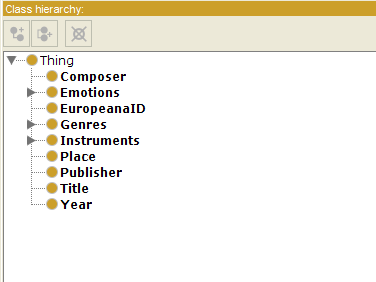

Αν επιλέξετε μια κλάση δεξιά εμφανίζεται η περιγραφή της

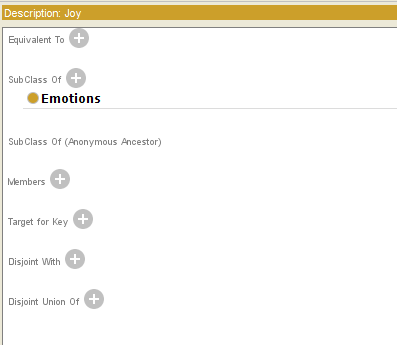

Μπορούμε να ορίσουμε ισοδυναμίες, υπερέννοιες, αξιώματα, άτομα και ξένες έννοιες πατώντας το αντίστοιχο σύμβολο protege-plus.PNG 

## <font color='red'> **3ο Μέρος: Εμπλουτισμένη Οντολογία και Δεδομένα**</font>

Στο τρίτο (3ο) μέρος της άσκησης καλείστε να χρησιμοποιήσετε κάποιο triplestore (προτείνεται το [GraphDB](https://graphdb.ontotext.com/)) στο οποίο θα "φορτώσετε" την εμπλουτισμένη οντολογία που δημιουργήσατε μέσω του Protégé στο δεύτερο (2ο) μέρος καθώς και τα δεδομένα που κρατήσαμε από το πρώτο (1ο) μέρος, να "τρέξετε" το reasoner ο οποίος θα εφαρμόσει στα δεδομένα σας όλους τους κανόνες που έχετε ορίσει μέσω της οντολογίας σας, εμπλουτίζοντας τα δεδομένα με τύπους και ρόλους (θα δείτε αναλύτικά πως λειτουργεί ένας reasoner στο μάθημα), και στη συνέχεια να εκτελέσετε ορισμένα SPARQL ερωτήματα στην ολοκληρωμένη οντολογία σας ώστε να δείξετε τα αποτελέσματα της ορθότητας αλλά και του εμπλουτισμού της οντολογίας σας.
Για παράδειγμα εάν έχετε δημιουργήσει έννοιες RockSong και PopSong οι οποίες είναι υποέννοιες του Song, μερικά SPARQL ερωτήματα που θα μπορούσατε να κάνετε είναι να δείξετε πώς μπορούμε πλέον να φέρουμε όλους τα ροκ κομμάτια απλώς ζητώντας όλους τους individuals που έχουν type RockSong, αντίστοιχα με τα ποπ κομμάτια και την έννοια PopSong, και τέλος να δείξετε πως εάν φέρετε όλα τα κομμάτια τότε έχουμε σαν απάντηση την ένωση των υποσυνόλων που έχετε δημιουργήσει. Καλείστε με αυτό τον τρόπο να παρουσιάσετε τουλάχιστον 4 αντίστοιχα παραδείγματα κατά προτίμηση να μην είναι ίδιου "είδους", δηλαδή να μην είναι όλα απλώς ιεραρχίες. Παρουσιάστε και σχολιάστε στο ακόλουθο markdown τα SPARQL ερωτήματα καθώς και τα αποτελέσματά τους / τι θέλουν να δείξουν.  
<!--Στο τέλος αυτού του μέρους να αποθηκεύσετε την οντολογία από το graphDB σε ένα αρχείο KR-Ex3_3.owl το οποίο θα παραδώσετε στο τέλος.--> 

### **Απάντηση 3**


### **1o παράδειγμα:**

Το 1ο παράδειγμα αναζητά το άτομο Ludwig_van_Beethoven και αποδεικνύει την αξιοπιστία του ανάστροφου ρόλου.

Έχουμε το παρακάτω query:

<br>PREFIX ns: <http://example.org/ns/>
<br>PREFIX prop: <http://example.org/props/>

<br>select distinct ?Songs_compososed_by ?Songs_has_composer 
<br>where {
<br> ns:Ludwig_van_Beethoven prop:isComposerOf ?Songs_compososed_by.
<br> ?Songs_has_composer prop:hasComposer ns:Ludwig_van_Beethoven.
<br> FILTER( ?Songs_has_composer = ?Songs_compososed_by).
<br>}
<br>GROUP BY ?Songs_compososed_by ?Songs_has_composer 

Παρατηρούμε ότι εμφανίζονται 265 αποτελέσματα και τα τραγούδια ταυτίζονται ανάμεσα στα 2 επιστρεφόμενα αποτελέσματα.

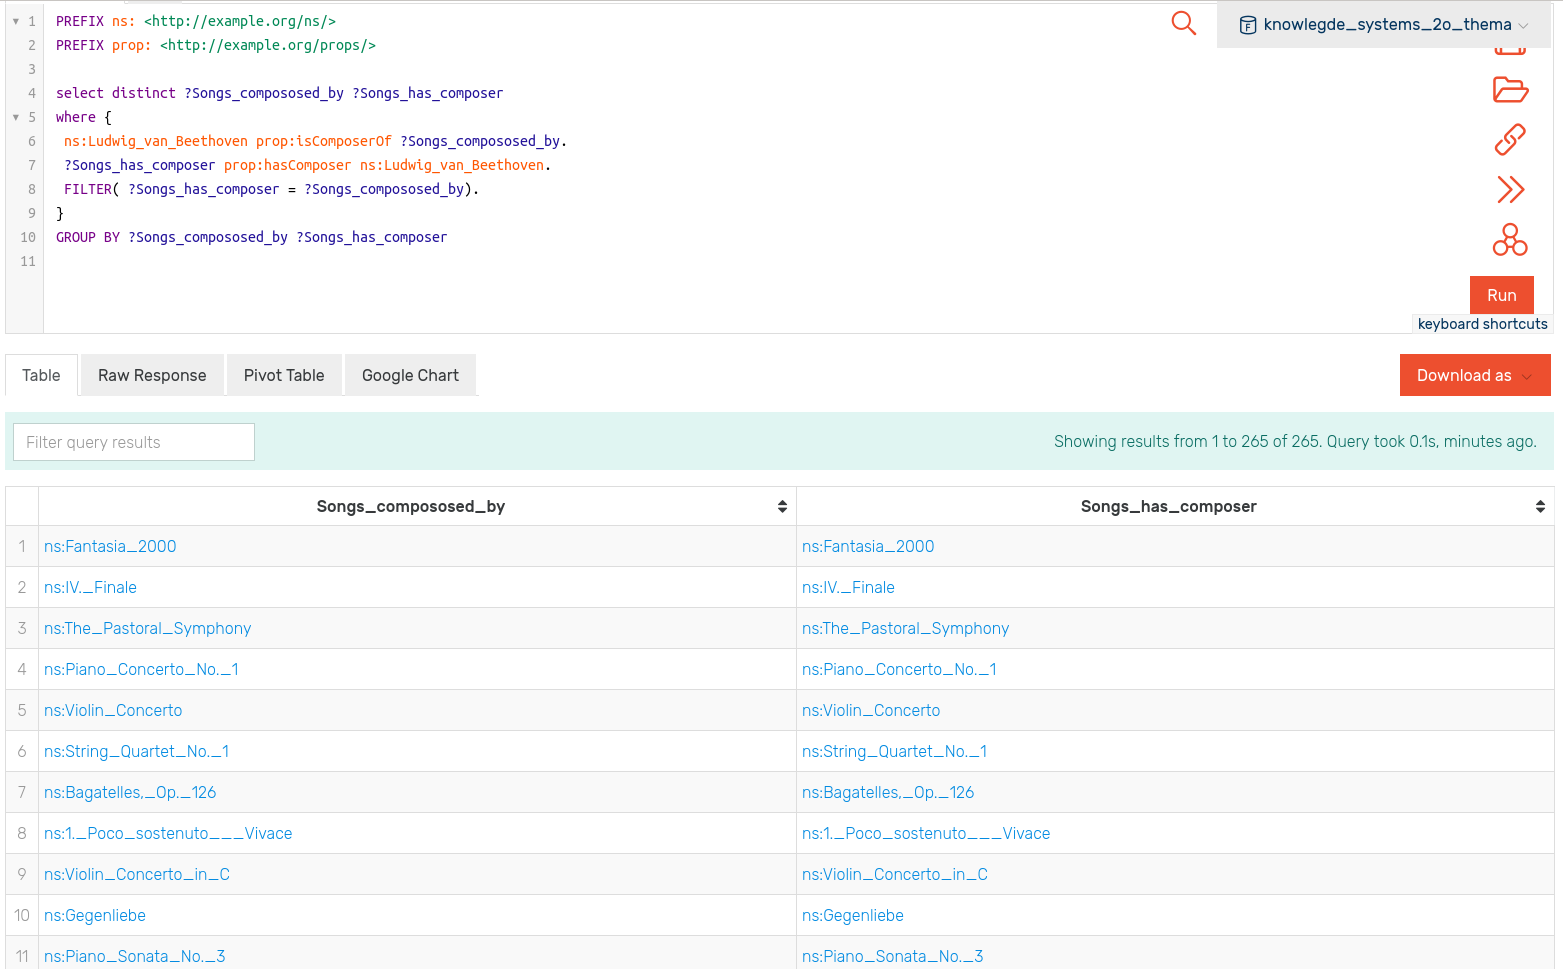

### **2o παράδειγμα:**

Στο 2ο παράδειγμα αναζητούμε μουσικά κομμάτια που έχουν τύπο Pop και Rock.

Έχουμε το παρακάτω query:

<br>PREFIX props: <http://example.org/props/>
<br>PREFIX ns: <http://example.org/ns/>

<br>select distinct ?Songs_with_Pop_and_Rock ?Songs_with_PopRock
<br>where {
<br>?Songs_with_Pop_and_Rock a ns:Pop_Song.
<br>?Songs_with_Pop_and_Rock a ns:Rock_Song.
<br>?Songs_with_PopRock a ns:PopRock_Song.
<br>FILTER (?Songs_with_Pop_and_Rock = ?Songs_with_PopRock)
<br>}
<br>GROUP BY ?Songs_with_Pop_and_Rock ?Songs_with_PopRock

Με αυτό query παρατηρούμε ότι εμφανίζονται 45 τραγούδια και επίσης παρατηρούμε πως οι τίτλοι που επιστρέφονται στα τραγούδια που είναι Pop και Rock είναι ίδιοι με τα τραγούδια που είναι PopRock.

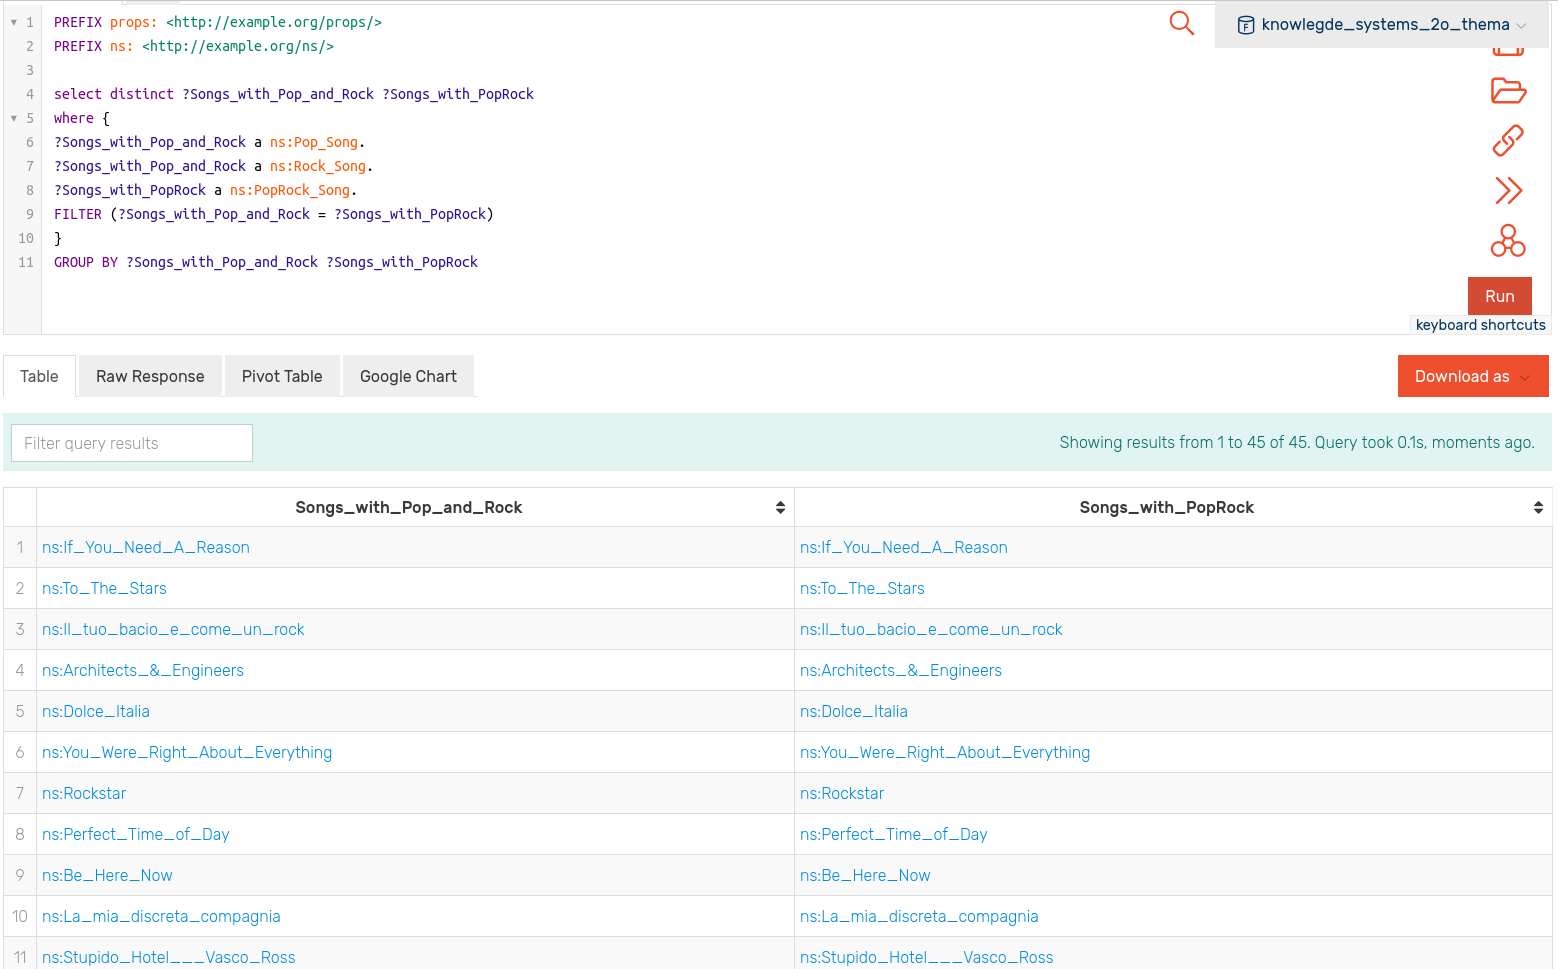

### **3o παράδειγμα:**


Στο 3ο παράδειγμα αναζητούμε μουσικά κομμάτια που είναι Pop και περιέχουν και ακουστική κιθάρα.

Έχουμε το παρακάτω query:

<br>PREFIX prop: <http://example.org/props/>
<br>PREFIX ns: <http://example.org/ns/>

<br>select distinct ?Songs_with_Pop_and_Acoustic_Guitar ?Songs_with_AcousticPop
<br>where {
<br>?Songs_with_Pop_and_Acoustic_Guitar a ns:Pop_Song.
<br>?Songs_with_Pop_and_Acoustic_Guitar prop:hasInstrument ns:Acoustic_Guitar.
<br>?Songs_with_AcousticPop a ns:AcousticPop_Song.
<br>FILTER (?Songs_with_Pop_and_Acoustic_Guitar = ?Songs_with_AcousticPop)
<br>}
<br>GROUP BY ?Songs_with_Pop_and_Acoustic_Guitar ?Songs_with_AcousticPop

Παρατηρούμε πως με αυτό το query επιστρέφονται συνολικά 65 μουσικά κομμάτια. Κάθε κομμάτι είναι Pop και περιέχει και ακουστική κιθάρα ως μουσικό οργανο. Τέλος τα τραγούδια ταυτίζονται ανάμεσα στα 2 επιστρεφόμενα αποτελέσματα.

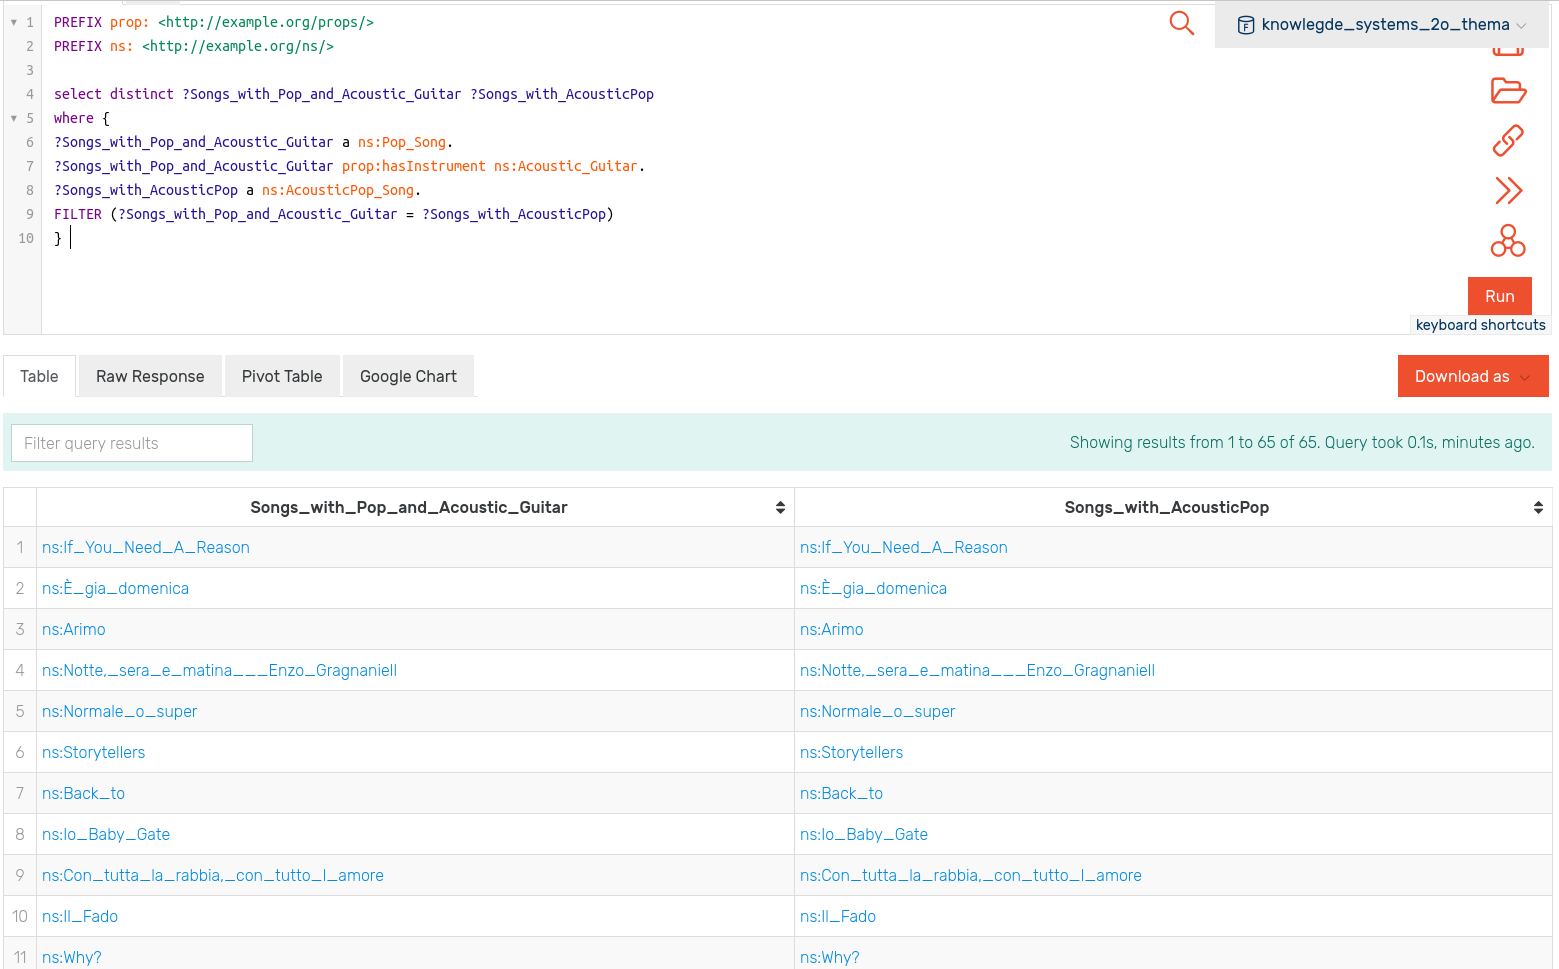

### **4o παράδειγμα:**

Στο 4ο παράδειγμα αναζητούμε μουσικά κομμάτια που είναι στη δεκαετία του 2010.

Έχουμε το παρακάτω query:

<br>PREFIX prop: <http://example.org/props/>
<br>PREFIX ns: <http://example.org/ns/>

<br>select distinct ?10s_Song
<br>where {
<br>?10s_Song a ns:10s_Song.
<br>}


Aπό οπτική παρατήρηση των αποτελεσμάτων βλέπουμε πως πράγματι πρόκειται για μουσικά κομμάτια με έτος κυκλοφορίας από το 2010 έως το 2019.

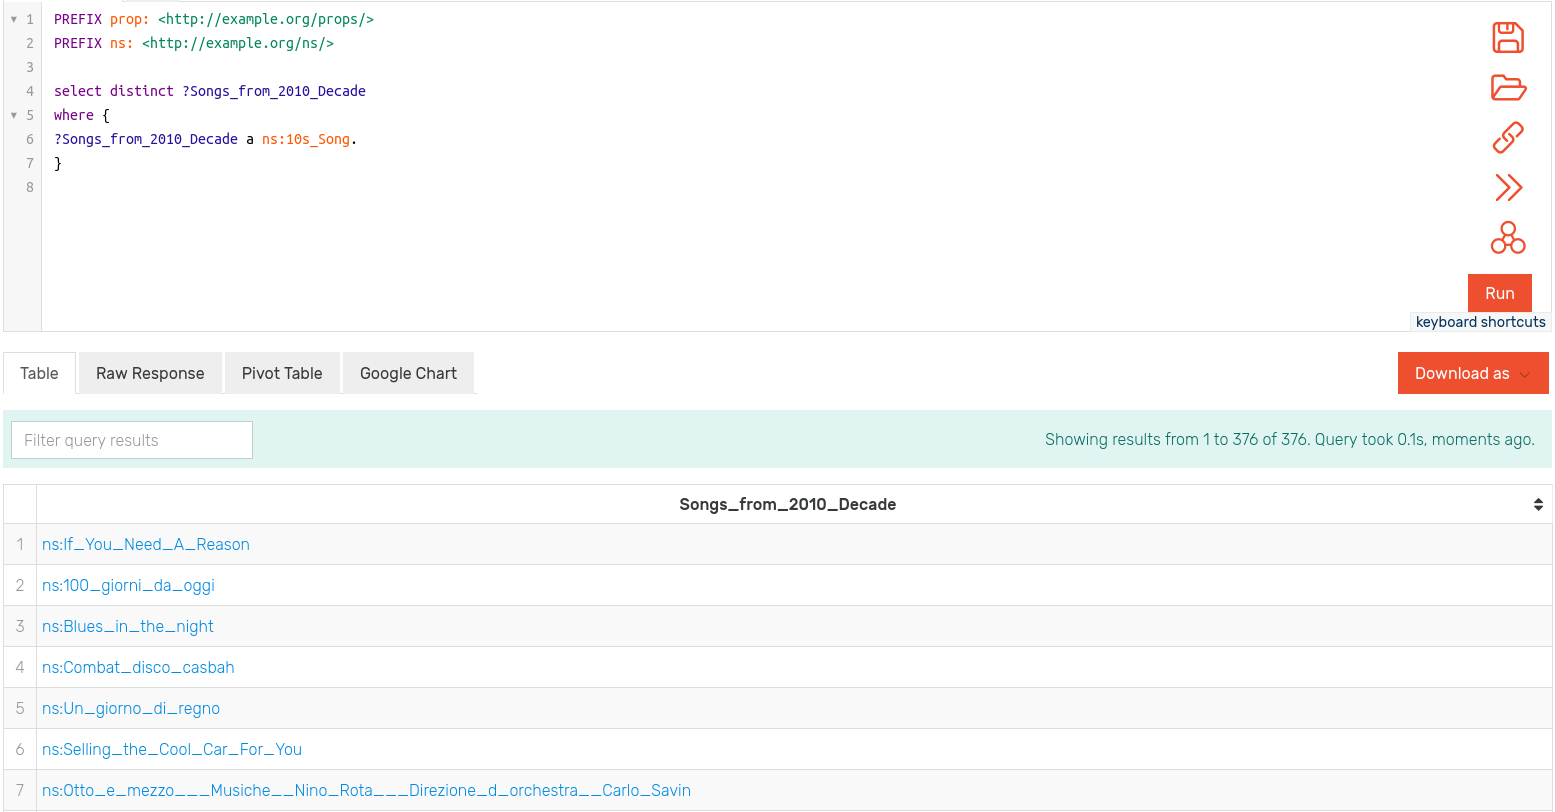

### **5o παράδειγμα:**

Στο 5ο παράδειγμα αναζητούμε μουσικά κομμάτια τα οποία ανήκουν στην κλάση Calm_Sounds_Song. Yπενθυμίζουμε αυτή η κλάση αφορά μουσικά κομμάτια που είναι Classical ή Instrumental είδους και περιέχουν ως μουσικά όργανα το βιολί και το πιάνο.

Έχουμε το παρακάτω query:

<br>PREFIX prop: <http://example.org/props/>
<br>PREFIX ns: <http://example.org/ns/>

<br>select distinct ?Songs_with_calm_sounds
<br>where {
<br>?Songs_with_calm_sounds a ns:CalmSounds_Song.
<br>}

Παρατηρούμε πως επιστρέφονται 7 αποτελέσματα. Από οπτική παρατήρηση των αποτελεσμάτων οι τίτλοι που επιστρέφονται πράγματι ταιριάζουν με τα ζητούμενα.

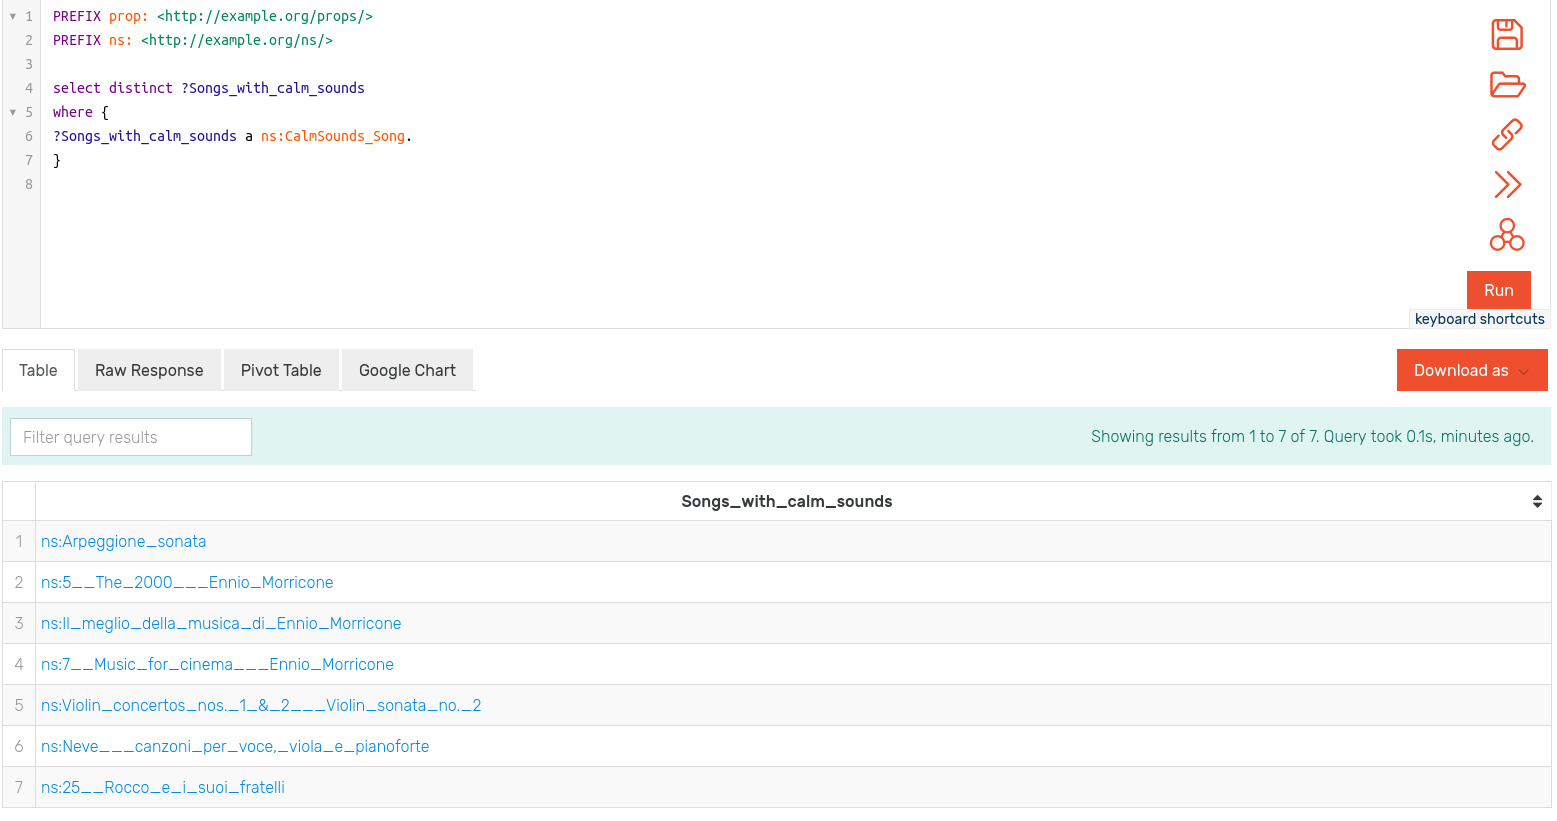

### **6o παράδειγμα:**

Tέλος στο 6ο παράδειγμα εκτελούμε ένα σύνθετο query το οποίο χρησιμοποιεί αρκετές από τις νέες έννοιες που έχουμε εισάγει μέσω του Protege. Συγκεκριμένα θα αναζητήσουμε μουσικά κομμάτια τα οποία είναι PopRock με ευχάριστα συναισθήματα από τη δεκαετία του 2010.

Έχουμε το παρακάτω query:

<br>PREFIX prop: <http://example.org/props/>
<br>PREFIX ns: <http://example.org/ns/>

<br>select distinct ?Songs
<br>where {
<br>?Songs a ns:FeelGood_Song.
<br>?Songs a ns:10s_Song.
<br>?Songs a ns:PopRock_Song.
<br>}

Παρατηρούμε πως επιστρέφονται μόλις 8 αποτελέσματα τα οποία πράγματι ανταποκρίνονται στις ζητούμενες απαιτήσεις. Μάλιστα από παρατήρηση των 8 τίτλων που επιστρέφονται βλέπουμε πως ανήκουν και στην κατηγορία JoyfulRock_Song. Αυτό διότι αναζητούμε τραγούδια που είναι PopRock άρα ανήκουν στην κατηγορία Rock. Επίσης αναζητούμε τραγούδια που είναι Pleasurable και Joyful. Άρα αφού είναι Joyful και Rock τότε ανήκουν και στην κατηγορία JoyfulRock_Song. Αυτή η παρατήρηση δείχνει τη συνέπεια που προκύπτει από τους ορισμούς που θέσαμε στις έννοιες νωρίτερα μέσω του Protege.

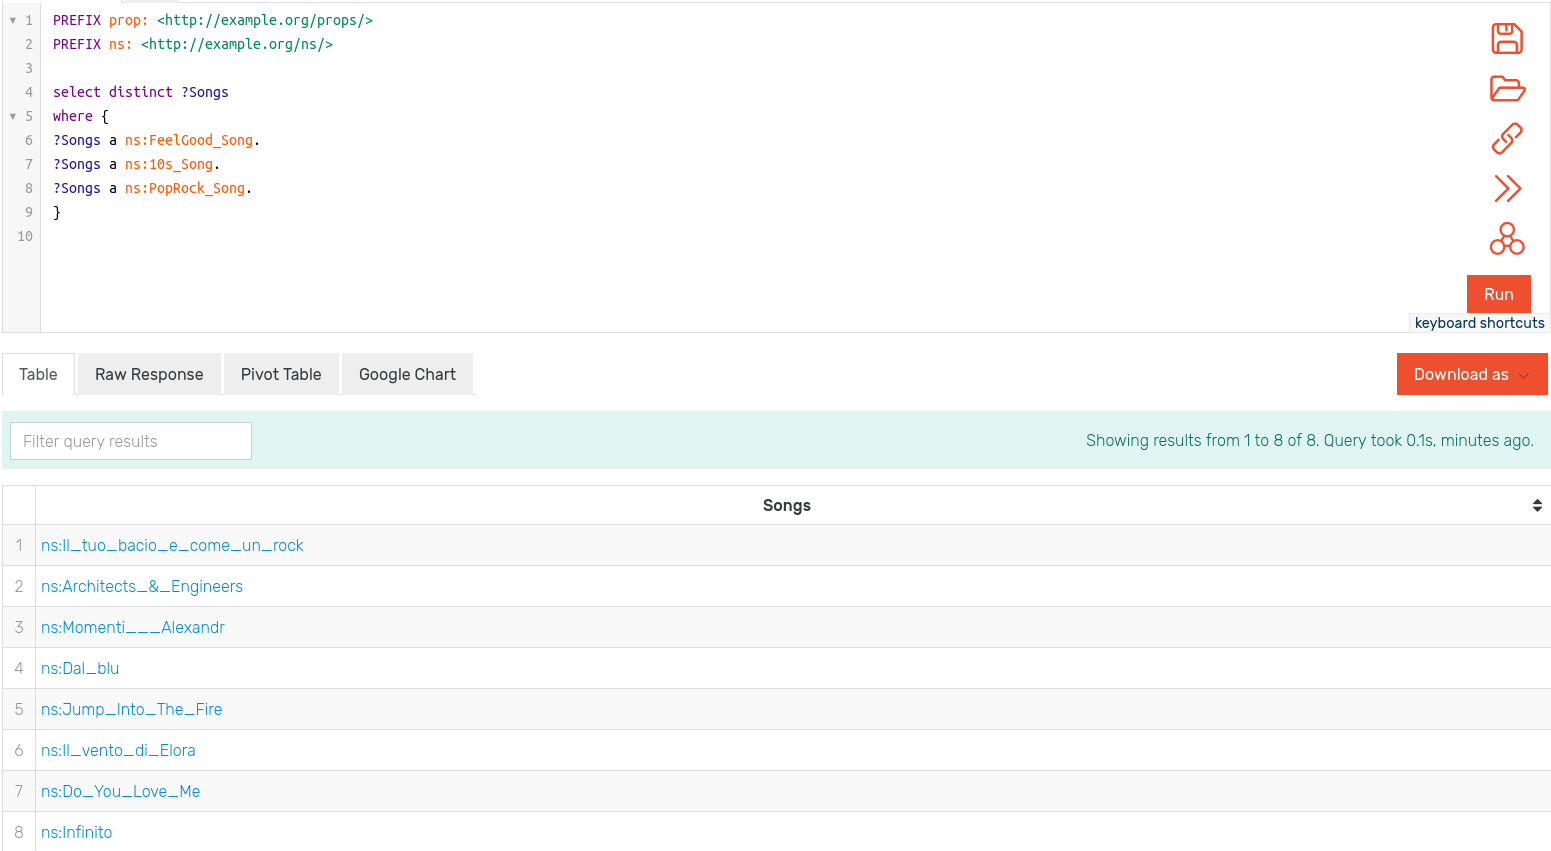

### Μικρό tutorial GraphDB

Αφού εγκατασταθεί και τρέξει η free έκδοση του GraphDB, θα ανοίξει ένα παράθυρο στο browser, στη διεύθυνση http://localhost:7200/ . Φτιάχνετε ένα repository, στο ruleset επιλέγετε OWL 2 RL. Πάνω αριστερά πατάτε Import->RDF upload RDF files και ανεβάζετε δύο αρχεία:
- Το ```myonto-graphDB.owl``` που είναι η οντολογία που φτιάξατε στο protegé  
- Το ```KR-Ex2_1.owl``` που είναι ο γράφος γνώσης με διορθώσεις όπως παράχθηκε στο ερώτημα 1.1.3

Στη συνέχεια μπορείτε να πατήσετε αριστερά Explore->Class Hierarchy για να επιβεβαιώσετε πως η οντολογία φορτώθηκε σωστά, και στη συνέχεια με την επιλογή SPARQL αριστερά θα τρέξετε τα ερωτήματα για την επίλυση της άσκησης.  

## After exercise suggestions:

#### **Nino Rota**
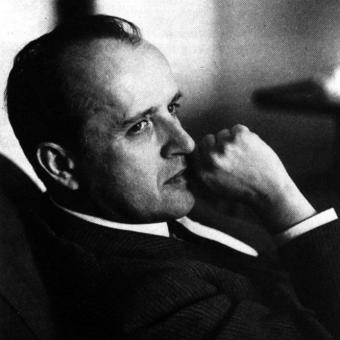

#### **Ennio Morricone**

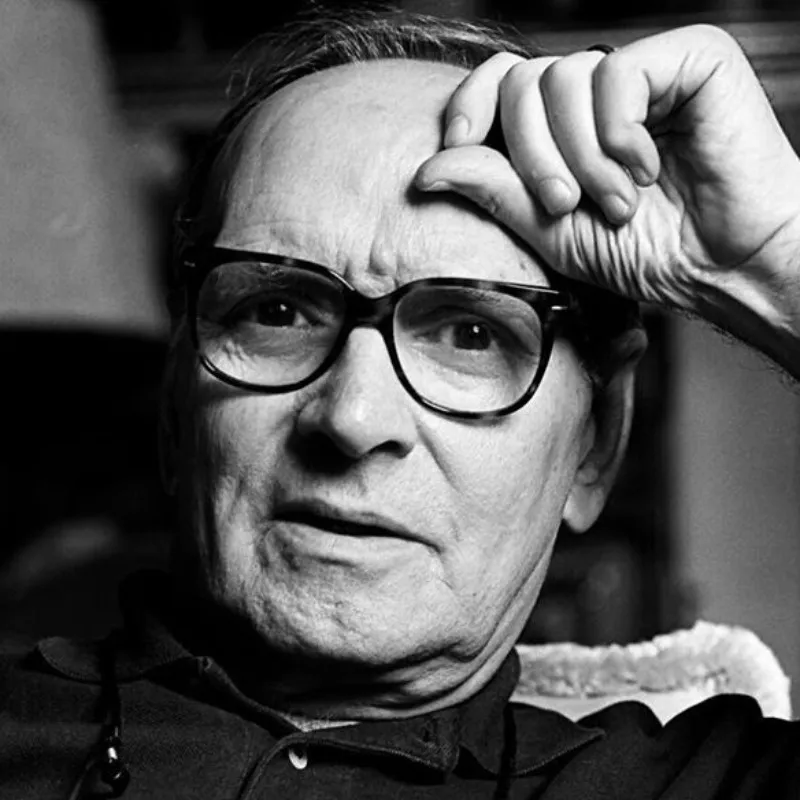

### Any suggestions by you?